# Исследование объявлений о продаже квартир
**Стоимость квартиры** — один из ключевых факторов в сделках с недвижимостью, который играет важнейшую роль в принятии решений о покупке и продаже. Ключевой вопрос при купле-продажи квартиры — как определить ее рыночную стоимость в конкретный момент времени.  
**Рыночная стоимость** — это цена, за которую объект может быть продан в условиях свободного рынка и с учетом конкуренции за период, соответствующий среднему сроку экспозиции(выставка объекта на рынке недвижимости). Показатель отражает текущую ситуацию на рынке и может зависеть от политического, экономического, социального положения и других условий.  
  
В нашем распоряжении данные сервиса **Яндекс.Недвижимость** — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.  
  
**Описание данных:**  
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
* balcony — число балконов  
* ceiling_height — высота потолков (м)  
* cityCenters_nearest — расстояние до центра города (м)  
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
* first_day_exposition — дата публикации  
* floor — этаж  
* floors_total — всего этажей в доме  
* is_apartment — апартаменты (булев тип)  
* kitchen_area — площадь кухни в квадратных метрах (м²)  
* last_price — цена на момент снятия с публикации  
* living_area — жилая площадь в квадратных метрах (м²)  
* locality_name — название населённого пункта  
* open_plan — свободная планировка (булев тип)  
* parks_around3000 — число парков в радиусе 3 км  
* parks_nearest — расстояние до ближайшего парка (м)  
* ponds_around3000 — число водоёмов в радиусе 3 км  
* ponds_nearest — расстояние до ближайшего водоёма (м)  
* rooms — число комнат  
* studio — квартира-студия (булев тип)  
* total_area — общая площадь квартиры в квадратных метрах (м²)  
* total_images — число фотографий квартиры в объявлении  
  
**Цели исследования** - научиться определять рыночную стоимость объектов недвижимости, а также выявить существенные факторы, влияющие на рыночную стоимость и второстепенные факторы, которые также учитывают при определении рыночной стоимости квартир. Второстепенные факторы не так важны, как существенные, однако для конкретного покупателя именно они могут выходить на первый план при выборе объекта.  
  
**Вопросы, на которые нужно ответить в процессе исследования:**  
1. Сколько времени обычно занимает продажа квартиры?
2. Какие продажи можно считать быстрыми, а какие — необычно долгими?
3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
4. В каких населённых пунктах больше всего объявлений о продаже квартир?
5. Чему равна средняя цена одного м2 в 10 населённых пунктах с наибольшим числом объявлений?
6. Как стоимость объектов зависит от расстояния до центра города.

## Шаг 1. Ознакомление с данными. <a class="anchor" id="one"></a>

**1.1. Импортируем библиотеки pandas и ещё несколько питоновских библиотек.**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np 
import seaborn as sns
import warnings

In [13]:
df = pd.read_csv('real_estate_data.csv')
pd.options.mode.chained_assignment = None  # отключаем предупреждения Pandas
pd.set_option("display.float_format", "{:.2f}".format)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,False,False,23.30,2.00,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00


**1.3. Выведем общую информацию о датафрейме, посмотрим на типы данных, количество ненулевых значений.**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

1. В таблице 23699 строк и 22 столбца, которые содержат различный тип данных.  
2. Очень много пропусков в данных, лишь в 8 столбцах нет отсутствующих значений.  
3. Типы данных не соответствуют заявленным в столбцах, например: в first_day_exposition вместо "object" должен быть "datetime64" или в is_apartment вместо "object" должнен быть тип данных "bool".

**1.4. Подсчитаем общее количество пропущенных значений в каждом столбце датафрейма.**

In [17]:
df.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

В 14 из 22 столбцов датафрейма пропущены значения.  
Больше всего пропусков в следующих столбцах:  
- "апартаменты" - 20924  
- "расстояние до ближайшего парка" - 15620  
- "расстояние до ближайшего водоёма" - 14589  
- "число балконов" - 11519

**1.5. Построим тепловую карту пропущенных значений. Красный цвет - пропущенные данные, синий - не пропущенные.**

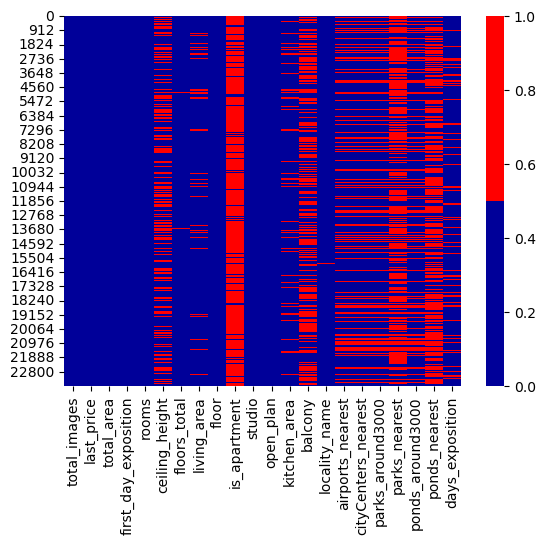

In [18]:
cols = df.columns[:22]
# определяем цвета
colours = ['#000099', '#ff0000'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

Тепловая карта визуально демонстрирует пропущенные значения в столбцах датафрейма.
На ней также сильнее всего выделяются столбцы "апартаменты","расстояние до ближайшего парка", "расстояние до ближайшего водоёма" и "число балконов".

**1.6. Выведем первые и последние 10 строк датафрейма, чтобы визуально ознакомиться с данными, а также рандомную выборку.**

In [19]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


In [20]:
df.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.00,35.30,2018-02-28T00:00:00,1,2.86,15.00,16.30,4,NaN,False,False,9.10,2.00,Санкт-Петербург,17284.00,16081.00,1.00,353.00,2.00,652.00,29.00
23690,3,5500000.00,52.00,2018-07-19T00:00:00,2,NaN,5.00,31.00,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.00,6263.00,1.00,300.00,0.00,NaN,15.00
23691,11,9470000.00,72.90,2016-10-13T00:00:00,2,2.75,25.00,40.30,7,NaN,False,False,10.60,1.00,Санкт-Петербург,19424.00,4489.00,0.00,NaN,1.00,806.00,519.00
23692,2,1350000.00,30.00,2017-07-07T00:00:00,1,NaN,5.00,17.50,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.00
23693,9,4600000.00,62.40,2016-08-05T00:00:00,3,2.60,9.00,40.00,8,NaN,False,False,8.00,0.00,Петергоф,45602.00,34104.00,1.00,352.00,1.00,675.00,239.00
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,False,False,23.30,2.00,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00
23698,4,1350000.00,32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9246,7,3800000.00,44.00,2018-03-07T00:00:00,2,NaN,5.00,27.00,1,NaN,False,False,7.20,NaN,Санкт-Петербург,45532.00,18256.00,0.00,NaN,0.00,NaN,40.00
6091,16,3300000.00,57.00,2017-06-20T00:00:00,3,NaN,3.00,35.20,2,NaN,False,False,6.10,0.00,поселок городского типа Дубровка,NaN,NaN,NaN,NaN,NaN,NaN,132.00
5960,0,5450000.00,73.00,2016-04-18T00:00:00,3,NaN,9.00,39.00,2,False,False,False,17.00,2.00,Колпино,28118.00,33904.00,0.00,NaN,0.00,NaN,94.00
2473,12,4900000.00,55.00,2016-05-25T00:00:00,2,2.60,16.00,31.00,13,NaN,False,False,10.00,0.00,Санкт-Петербург,18449.00,21873.00,0.00,NaN,2.00,922.00,49.00
11065,14,5000000.00,51.30,2016-07-31T00:00:00,2,NaN,12.00,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,15264.00,17135.00,0.00,NaN,0.00,NaN,933.00
13090,10,4000000.00,50.00,2016-10-17T00:00:00,2,3.00,4.00,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,20807.00,6683.00,0.00,NaN,2.00,241.00,523.00
23332,8,2990000.00,31.40,2018-03-31T00:00:00,1,2.50,5.00,17.00,3,NaN,False,False,5.50,1.00,Санкт-Петербург,12766.00,12678.00,0.00,NaN,1.00,758.00,19.00
14437,9,4950000.00,51.00,2018-12-12T00:00:00,2,2.50,9.00,28.00,5,NaN,False,False,8.10,NaN,Санкт-Петербург,39650.00,12553.00,0.00,NaN,0.00,NaN,NaN
10623,6,3750000.00,45.00,2017-09-13T00:00:00,2,2.50,5.00,28.00,4,NaN,False,False,6.50,1.00,Санкт-Петербург,17517.00,15904.00,1.00,979.00,0.00,NaN,264.00
9305,0,5820000.00,55.00,2018-09-18T00:00:00,2,NaN,6.00,30.00,3,NaN,False,False,10.00,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,31.00


**1.7. Для получения первичного представления о статистических характеристиках датасета, воспользуемся методом describe().**

In [22]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


- В данных местами есть выбросы, например, в виде 100 метровых потолков или 1580 дней размещения объявлений. 
- Также есть вопросы к числу комнат, мин. - 0(хотя в квартире по умолчанию может быть минимум одна комната), макс. - 19.  
- Жилая площадь, мин. значение - 2 м2, а макс. - 409,7 м2. Минимальное значение очень странное.
- Площадь кухни мин. значение - 1,3 м2, против макс. - 112 м2.

**1.8. Строим общую гистограмму для всех столбцов таблицы.**

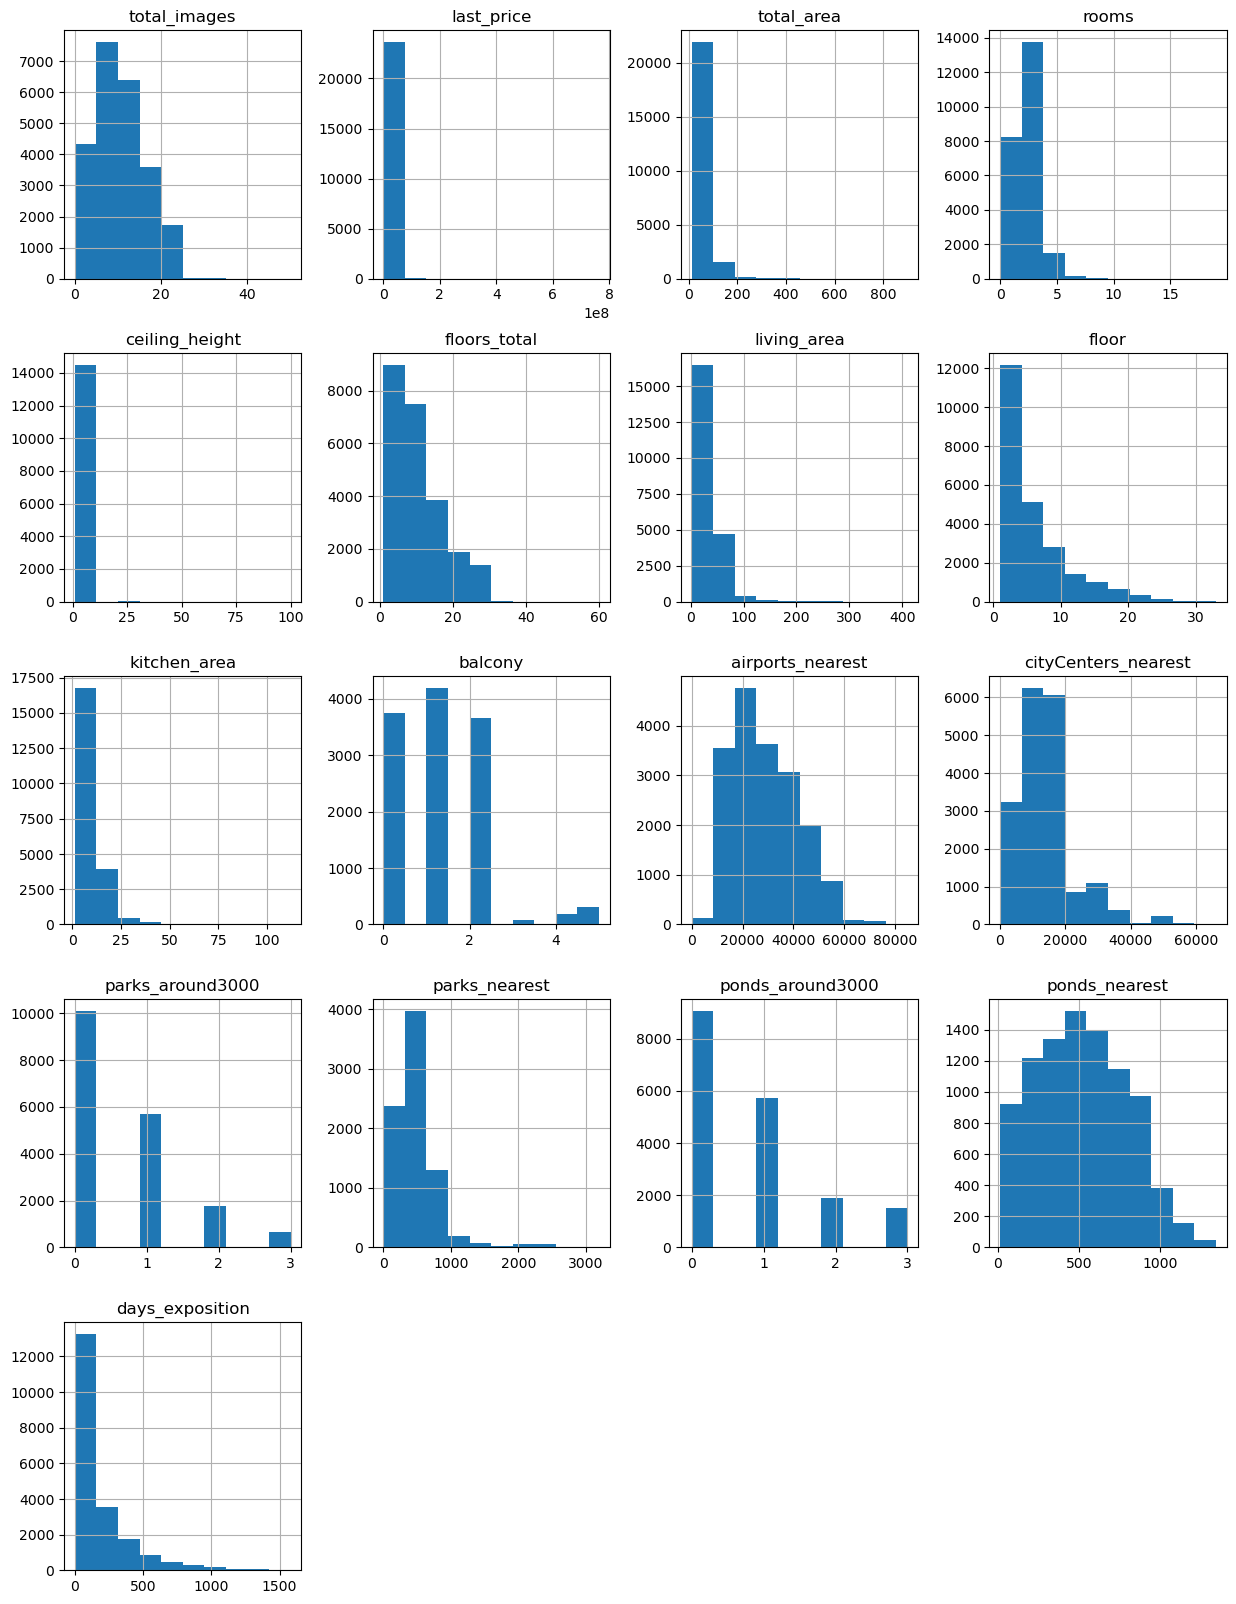

In [23]:
df.hist(figsize=(15, 20))
plt.show()

Гистограмма объединяет числовые значения по диапазонам, поэтому вывести её для всех столбцов таблицы не представляется возможным. На графиках распределение данных смещено влево, что напоминает нам о распределение Пуассона. 
На некоторых графиках можно увидеть как закономерности так и выбросы, которые отличаются от общей массы, например:
- Комнаты. Больше всего продается 2х и 3х комнатных квартир. Есть выброс, больше 5 комнат
- Высота потолков. Основная масса квартир с высотой потолков до 12,5 м2. Есть выбросы по высоте 25+ м2.

**1.9. Общий вывод**

1. Необходимо разобраться с пропущенными значениями в 14 столбцах, вариантов несколько - заменить на среднее/медиану, удалить или пропустить, если они не искажают сильно общую картину.
2. Также небходимо будет заменить или удалить очень редкие и аномальные значения т.к. у нас должно быть нормальное распределение данных, к тому же нам не известна природа их возникновения (например, квартиры с аномально высокими потолками.)
3. Нужно привести типы данных в соответствие.
4. Отсутствующие данные **по балконам** попробуем взять за 0, если их не заполняли, скорее всего они просто отсутствуют на объектах, также и в данных **"is_apartment"**, можно предположить, что они не заполнены пользователями т.к. не являются апартаментами.
5. Нужно заменить некорректные названия столбцов, такие как **"cityCenters_nearest".**
6. Нужно привести к общему названию значения столбца **"locality_name"** - посёлок и городской посёлок.
7. Данные по **расстояниям до ближайшего парка и до ближайшего водоёма (+в радиусе 3 км)** возможно ошибочно не были выгружены системой. Предполагаю, что они не относятся к основным факторам, влияющим на рыночную стоимость квартир. К тому же, полагаю невозможным в кратчайшие сроки проставить какие-либо адекватные значения для расстояния до этих объектов, которое не исказило бы статистические данные по уже присутствующим данным по этим столбцам, поэтому считаю разумным не трогать эти данные, а оставить как есть, воспользовавшись теми данными, которые заполнены надлежащим образом.
8. Пропуски в **"days_exposition"** возможно образовались из-за того, что объявление пользователями не было своевременно закрыто после закрытия сделки, отсюда и вытекают аномальные сроки продажи квартиры в несколько лет.
9. В столбцах по **метражу кухни и жилой площади, этажности мкд**, данные могут отсутствовать из-за не обязательности заполнения (чтобы не ставить пользователю жесткий фильтр для своего объявления). При покупке или продаже обычно интересует количество комнат и общий метраж, не так много людей в первую очередь интересуется площадью кухни или этажностью. Предстоит решить заполнить эти отсутствующие данные в столбцах или оставить как есть. Думаю, что пропуски в этажности проще удалить т.к. их мало, отсутствие этих данных не исказит общую картину.

## Шаг 2. Предобработка данных. <a class="anchor" id="two"></a>

### 2.1. Пропущенные значения в столбцах 
**2.1.1. Взглянем ещё раз на столбцы с пропусками NaN**

In [25]:
#получаем общее количество всех NaN
df.isnull().sum().sum()

101441

In [32]:
#получаем количество NaN в каждом столбце
df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

**2.1.2. Проведем работу над столбцом "ceiling_height" (пропуски).**

In [33]:
# описываем функцию для категоризации
def category_center(row):
    if row['cityCenters_nearest'] <= 2000:
        return 'исторический центр спб'
    if 2000 < row['cityCenters_nearest'] <= 8000:
        return 'центр спб'
    if 8000 < row['cityCenters_nearest'] <= 18000:
        return 'спальный район спб'
    elif 18000 < row['cityCenters_nearest'] <= 65968:
        return 'ленобласть'
df['category_center'] = df.apply(category_center, axis=1)

In [37]:
df.groupby('category_center')['ceiling_height'].agg(['count','mean'])

,count,mean
category_center,,
исторический центр спб,228,3.23
ленобласть,1897,2.68
спальный район спб,7248,2.71
центр спб,2187,3.09


In [42]:
df = df.reset_index(drop=True)

df['ceiling_height'] = df.groupby('category_center')['ceiling_height'].transform(lambda x: x.fillna(x.mean()))

print('Количество пропущенных значений в столбце ceiling_height:', df['ceiling_height'].isnull().sum())

Количество пропущенных значений в столбце ceiling_height: 5519


**2.1.3. Проведем работу над столбцом "floors_total" (пропуски).**

In [43]:
df.loc[df['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_center
186,12,11640000.00,65.20,2018-10-02T00:00:00,2,2.71,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.00,12373.00,1.00,123.00,0.00,NaN,49.00,спальный район спб
237,4,2438033.00,28.10,2016-11-23T00:00:00,1,2.71,NaN,20.75,1,NaN,False,False,NaN,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,251.00,спальный район спб
457,4,9788348.00,70.80,2015-08-01T00:00:00,2,2.71,NaN,38.40,12,NaN,False,False,10.63,0.00,Санкт-Петербург,37364.00,8322.00,2.00,309.00,2.00,706.00,727.00,спальный район спб
671,4,6051191.00,93.60,2017-04-06T00:00:00,3,2.71,NaN,47.10,8,NaN,False,False,16.80,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,123.00,спальный район спб
1757,5,3600000.00,39.00,2017-04-22T00:00:00,1,2.71,NaN,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,22735.00,11618.00,1.00,835.00,1.00,652.00,77.00,спальный район спб
1930,1,9750000.00,66.77,2016-05-13T00:00:00,2,2.71,NaN,NaN,4,NaN,False,False,NaN,0.00,Санкт-Петербург,39886.00,10660.00,1.00,2276.00,3.00,244.00,90.00,спальный район спб
2392,7,5395770.00,53.00,2017-06-29T00:00:00,2,2.71,NaN,29.00,22,NaN,False,False,9.00,0.00,Санкт-Петербург,43074.00,10820.00,0.00,NaN,0.00,NaN,48.00,спальный район спб
2846,4,2325000.00,27.80,2016-09-21T00:00:00,1,2.71,NaN,19.40,15,NaN,False,False,NaN,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,307.00,спальный район спб
2952,10,6500000.00,54.30,2019-04-23T00:00:00,1,3.09,NaN,22.20,6,NaN,False,False,12.30,NaN,Санкт-Петербург,23606.00,3148.00,0.00,NaN,0.00,NaN,NaN,центр спб
3031,9,6400000.00,56.70,2018-03-27T00:00:00,2,NaN,NaN,32.00,12,NaN,False,False,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.00,None


In [44]:
df['floors_total'] = df['floors_total'].fillna(0)
def floor_total_nan(row):
    if row['floors_total'] == 0:
        return (row['floor'] + 1)
    else:
        return row['floors_total']
       
df.loc[:, 'floors_total'] = df.apply(floor_total_nan, axis=1)

print('Количество пропущенных значений в столбце floors_total:', df['floors_total'].isnull().sum())


Количество пропущенных значений в столбце floors_total: 0


Сложно на первый взгляд составить представление об этажности МКД по смежным данным. Но, мы попробуем заменить эти пропуски прибавляя 1 к этажу квартиры т.к. судя по первым и последним строкам таблицы, этаж квартиры часто ниже этажности МКД, значений немного (всего 86), такие изменения не окажут сильное влияние на общую картину.

**2.1.4. Проведем работу над столбцом "living_area" (пропуски).**

In [45]:
df_avg_living = (df['living_area'] / df['rooms']).groupby(df['rooms']).mean()
df.loc[df['living_area'].isnull(), 'living_area'] = (
    df.loc[df['living_area'].isnull(), 'rooms'].apply(lambda x: x * df_avg_living[x]))
print('Количество пропущенных значений в столбце living_area:', df['living_area'].isnull().sum())

Количество пропущенных значений в столбце living_area: 14


/tmp/ipykernel_6278/496594272.py:3: RuntimeWarning: invalid value encountered in scalar multiply
  df.loc[df['living_area'].isnull(), 'rooms'].apply(lambda x: x * df_avg_living[x]))


In [46]:
df.loc[df['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_center
608,2,1850000.00,25.00,2019-02-20T00:00:00,0,NaN,10.00,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.00,None
780,9,2600000.00,26.10,2018-02-20T00:00:00,0,NaN,18.00,NaN,8,NaN,False,True,NaN,1.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.00,None
2409,4,1980000.00,27.00,2018-03-23T00:00:00,0,2.68,18.00,NaN,4,NaN,True,False,NaN,NaN,посёлок Петро-Славянка,20605.00,27165.00,0.00,NaN,2.00,663.00,75.00,ленобласть
3147,7,2170000.00,31.00,2017-12-30T00:00:00,0,NaN,12.00,NaN,12,NaN,True,False,NaN,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,198.00,None
3874,13,1700000.00,21.40,2015-02-11T00:00:00,0,NaN,3.00,NaN,2,NaN,True,False,NaN,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4901,5,2200000.00,24.00,2018-10-22T00:00:00,0,NaN,7.00,NaN,6,NaN,True,False,NaN,NaN,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,51.00,None
5187,5,3300000.00,25.40,2018-11-02T00:00:00,0,NaN,16.00,NaN,15,NaN,True,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.00,None
5749,20,3590000.00,25.00,2017-08-30T00:00:00,0,2.80,35.00,NaN,26,NaN,False,True,NaN,2.00,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,198.00,ленобласть
5958,1,3200000.00,30.30,2018-09-07T00:00:00,0,2.71,14.00,NaN,13,NaN,True,False,NaN,NaN,Санкт-Петербург,22735.00,11618.00,1.00,835.00,1.00,652.00,68.00,спальный район спб
7818,11,3300000.00,27.30,2018-04-06T00:00:00,0,2.71,20.00,NaN,9,NaN,False,True,NaN,2.00,Санкт-Петербург,15990.00,13853.00,0.00,NaN,1.00,584.00,31.00,спальный район спб


In [47]:
#убираем строку, где значение в столбце "total_area" = 371.0
df = df[df.total_area != 371.0 ]

In [48]:
df.loc[df['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_center
608,2,1850000.00,25.00,2019-02-20T00:00:00,0,NaN,10.00,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.00,None
780,9,2600000.00,26.10,2018-02-20T00:00:00,0,NaN,18.00,NaN,8,NaN,False,True,NaN,1.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.00,None
2409,4,1980000.00,27.00,2018-03-23T00:00:00,0,2.68,18.00,NaN,4,NaN,True,False,NaN,NaN,посёлок Петро-Славянка,20605.00,27165.00,0.00,NaN,2.00,663.00,75.00,ленобласть
3147,7,2170000.00,31.00,2017-12-30T00:00:00,0,NaN,12.00,NaN,12,NaN,True,False,NaN,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,198.00,None
3874,13,1700000.00,21.40,2015-02-11T00:00:00,0,NaN,3.00,NaN,2,NaN,True,False,NaN,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4901,5,2200000.00,24.00,2018-10-22T00:00:00,0,NaN,7.00,NaN,6,NaN,True,False,NaN,NaN,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,51.00,None
5187,5,3300000.00,25.40,2018-11-02T00:00:00,0,NaN,16.00,NaN,15,NaN,True,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.00,None
5749,20,3590000.00,25.00,2017-08-30T00:00:00,0,2.80,35.00,NaN,26,NaN,False,True,NaN,2.00,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,198.00,ленобласть
5958,1,3200000.00,30.30,2018-09-07T00:00:00,0,2.71,14.00,NaN,13,NaN,True,False,NaN,NaN,Санкт-Петербург,22735.00,11618.00,1.00,835.00,1.00,652.00,68.00,спальный район спб
7818,11,3300000.00,27.30,2018-04-06T00:00:00,0,2.71,20.00,NaN,9,NaN,False,True,NaN,2.00,Санкт-Петербург,15990.00,13853.00,0.00,NaN,1.00,584.00,31.00,спальный район спб


In [49]:
# опишем функцию которая заполнит оставшиеся пропуски жилой площади
def living_nan(row):
    if (row['rooms'] == 0) & (row['living_area'] != row['living_area']) & (row['balcony'] == 0):
        return (row['total_area'] - 9)
    elif (row['rooms'] == 0) & (row['living_area'] != row['living_area']) & (row['balcony'] == 1):
        return (row['total_area'] - 11)
    else:
        return (row['total_area'] - 13)
df.loc[:, 'living_area'] = df.apply(living_nan, axis=1)

print('Количество пропущенных значений в столбце living_area:', df['living_area'].isnull().sum()) 

Количество пропущенных значений в столбце living_area: 0


1. Рассчитываем средний коэффициент отношения жилой площади к количеству комнат.
2. На основе полученных данных заполняем пропущенные значения. 
3. Выводим на экран полученный результат.
4. У нас есть одна аномалия, значение общей площадью 371.0, предварительно его удалим и сделаем замену пустых значений жилой площади на разность (где из общей площади вычтем минимум по площадям других помещений с учетом наличия и отсутствия балконов)
5. Пропущенные значения остались только в квартирах, где 0 комнат, предполагаю что всё таки это квартиры студии т.к. указано либо значения студия либо открытая планировка. К сожалению в этих квартирах не указан метраж кухонь, хотя юридически минимальное кухонное пространство должно составлять 5 м2, весь остальной метраж (не считая санузла и коридора) считается жилым. Иногда считают наоборот, в этом случае минимальная площадь комнаты считается равной 9 м2. Площадь ванной, совмещенной с санузлом, должна быть не меньше 3,5–4 м2.  
В малогабаритных квартирах стандартной планировки балконы от 2,1 м², встроенная лоджия от 3,6 м² ─ значительная площадь, если использовать ее эффективно. Официально она не считается жилой. Итого, из общей площади примерно можно вычесть минимум 13м2 - если 2 балкона, 11м2 - если 1 балкон и 9м2 - если балкона нет, чтобы найти приближенно оставшуюся жилую.


**2.1.5. Проведем работу над столбцом "kitchen_area" (пропуски).**

In [50]:
df['kitchen_area'].isna().sum()

2277

In [51]:
df['kitchen_area']=df['kitchen_area'].fillna(df['kitchen_area'].median())#заполним средним

In [52]:
df['kitchen_area'].isna().sum()

0

In [53]:
df = df.dropna(subset=['kitchen_area']).reset_index()

1. Проверим количество пропусков в столбце.
2. Пропусков не так много, поэтому, чтобы не удалять строки, заполним их средним значением.
3. Проверим полученный результат.
3. Если что-то пойдет не так с дальнейшим исследованием, вернусь к этому пункту и удалю пропуски.

**2.1.6. Проведем работу над столбцом "balcony" (пропуски).**

In [54]:
df['balcony'].isna().sum()

11518

In [55]:
df.groupby(["balcony"]).sum()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_center
balcony,,,,,,,,,,,,,,,,,,,,,,,
0.00,44788491,32206,24852590327.00,232475.44,2015-08-20T00:00:002015-07-24T00:00:002016-06-...,8013,8573.11,36983.00,183621.44,19976,0,12,7,38491.84,Санкт-ПетербургСанкт-ПетербургСертоловоПушкинС...,85356215.00,42049214.00,2034.00,672355.00,2450.00,807756.00,716000.00,спальный район спбцентр спбленобластьцентр спб...
1.00,49509494,41869,24927740852.00,239741.94,2017-11-02T00:00:002018-08-27T00:00:002017-07-...,8375,8565.22,43924.00,185208.94,26066,12,18,15,41262.69,посёлок ПарголовоЛомоносовПетергофСанкт-Петерб...,89207647.00,47574934.00,1867.00,659647.00,2210.00,797963.00,638445.00,ленобластьленобластьленобластьспальный район с...
2.00,42462573,37236,22193030421.00,204900.09,2018-12-04T00:00:002019-04-18T00:00:002017-02-...,6744,7497.72,49902.00,157333.09,28118,14,61,32,39588.06,посёлок ШушарыСанкт-ПетербургСанкт-Петербургпо...,82989498.00,41504479.00,1161.00,506642.00,1908.00,687812.00,533060.00,ленобластьспальный район спбспальный район спб...
3.00,1009414,946,1105373000.00,7134.28,2017-05-18T00:00:002018-02-01T00:00:002018-02-...,242,168.22,908.00,6081.28,550,0,0,0,1068.74,Кингисепппосёлок ШушарыСанкт-ПетербургСанкт-Пе...,1797359.00,896888.00,44.00,16857.00,56.00,18104.00,14211.00,ленобластьспальный район спбспальный район спб...
4.00,2235149,2074,1919456780.00,14901.00,2017-02-17T00:00:002019-01-22T00:00:002016-11-...,484,434.51,2078.00,12522.00,1296,1,0,0,2476.77,Санкт-ПетербургВсеволожскСанкт-ПетербургСанкт-...,4224900.00,2099617.00,113.00,41517.00,132.00,32468.00,30061.00,центр спбцентр спбспальный район спбспальный р...
5.00,3755977,3388,2688941523.00,24574.50,2016-05-04T00:00:002015-07-08T00:00:002017-11-...,820,804.62,4125.00,20622.50,2425,4,0,0,3835.21,Санкт-ПетербургПетергофСанкт-ПетербургСанкт-Пе...,7573179.00,3683655.00,122.00,54253.00,157.00,58375.00,41857.00,спальный район спбленобластьленобластьспальный...


In [56]:
df.loc[df['balcony'].isna()]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_center
0,0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,95.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,спальный район спб
4,4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,87.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,спальный район спб
5,5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,17.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,None
8,8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,20.16,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,None
10,10,5,5050000.00,39.60,2017-11-16T00:00:00,1,2.67,12.00,26.60,3,NaN,False,False,8.50,NaN,Санкт-Петербург,38357.00,13878.00,1.00,310.00,2.00,553.00,137.00,спальный район спб
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,23692,2,1350000.00,30.00,2017-07-07T00:00:00,1,NaN,5.00,17.00,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.00,None
23693,23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,120.81,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN,центр спб
23694,23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,NaN,5.00,46.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00,None
23695,23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,NaN,3.00,43.70,1,NaN,False,False,9.10,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [57]:
df['balcony'] = df['balcony'].fillna(0)
print('Количество пропущенных значений в столбце balcony:', df['balcony'].isnull().sum())

Количество пропущенных значений в столбце balcony: 0


1. Проверим количество пропусков в столбце.
2. В столбце количество балконов идет в разброс от 0 до 5. Логично предположить, что NaN - это отсутствующие балконы, поэтому нет корректных данных. Хотя смущает то, что метраж, количество комнат и этаж очень различны, здесь не вывести единое значение или среднее/медиану так, чтобы картина сильно не изменилась. Отсутствие балконных блоков, лоджий чаще компенсируется с помощью современных решений — панорамным остеклением, наличием в квартире гардеробных помещений, кладовых, которые могут также размещаться в цокольном этаже дома или подземном паркинге.
3. *Пока эти данные нам для расчётов не требуются, поэтому не буду их трогать, но если появится необходимость, то заменим пропуски на 0.*

**2.1.7. Проведем работу над столбцом "parks_around3000" (пропуски).**

In [58]:
df['parks_around3000'].isna().sum()

5518

In [59]:
df.loc[df['parks_around3000'].isna()]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_center
5,5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,17.40,5,NaN,False,False,9.10,0.00,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,None
8,8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,20.16,26,NaN,False,False,8.81,0.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,None
12,12,10,3890000.00,54.00,2016-06-30T00:00:00,2,NaN,5.00,41.00,5,NaN,False,False,9.00,0.00,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.00,None
22,22,20,5000000.00,58.00,2017-04-24T00:00:00,2,NaN,25.00,45.00,15,NaN,False,False,11.00,2.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.00,None
30,30,12,2200000.00,32.80,2018-02-19T00:00:00,1,NaN,9.00,19.80,2,NaN,False,False,9.10,0.00,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23682,23683,16,2100000.00,62.80,2018-09-18T00:00:00,4,NaN,5.00,49.80,3,NaN,False,False,5.50,0.00,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
23691,23692,2,1350000.00,30.00,2017-07-07T00:00:00,1,NaN,5.00,17.00,4,NaN,False,False,6.00,0.00,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.00,None
23694,23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,NaN,5.00,46.00,4,NaN,False,False,8.50,0.00,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00,None
23695,23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,NaN,3.00,43.70,1,NaN,False,False,9.10,0.00,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [60]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [61]:
df['parks_around3000'].isna().sum()

0

1. Проверим количество пропусков в столбце.
2. Отсутствующие значения могут говорить об отсутствии парков в радиусе 3 км. от недвижимости. Попробуем заменить их на 0.

**2.1.8. Проведем работу над столбцом "ponds_around3000" (пропуски).**

In [62]:
df['ponds_around3000'].isna().sum()

5518

In [63]:
df.loc[df['ponds_around3000'].isna()]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_center
5,5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,17.40,5,NaN,False,False,9.10,0.00,городской посёлок Янино-1,NaN,NaN,0.00,NaN,NaN,NaN,55.00,None
8,8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,20.16,26,NaN,False,False,8.81,0.00,посёлок Мурино,NaN,NaN,0.00,NaN,NaN,NaN,189.00,None
12,12,10,3890000.00,54.00,2016-06-30T00:00:00,2,NaN,5.00,41.00,5,NaN,False,False,9.00,0.00,Сертолово,NaN,NaN,0.00,NaN,NaN,NaN,90.00,None
22,22,20,5000000.00,58.00,2017-04-24T00:00:00,2,NaN,25.00,45.00,15,NaN,False,False,11.00,2.00,деревня Кудрово,NaN,NaN,0.00,NaN,NaN,NaN,60.00,None
30,30,12,2200000.00,32.80,2018-02-19T00:00:00,1,NaN,9.00,19.80,2,NaN,False,False,9.10,0.00,Коммунар,NaN,NaN,0.00,NaN,NaN,NaN,63.00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23682,23683,16,2100000.00,62.80,2018-09-18T00:00:00,4,NaN,5.00,49.80,3,NaN,False,False,5.50,0.00,посёлок Дзержинского,NaN,NaN,0.00,NaN,NaN,NaN,NaN,None
23691,23692,2,1350000.00,30.00,2017-07-07T00:00:00,1,NaN,5.00,17.00,4,NaN,False,False,6.00,0.00,Тихвин,NaN,NaN,0.00,NaN,NaN,NaN,413.00,None
23694,23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,NaN,5.00,46.00,4,NaN,False,False,8.50,0.00,Тосно,NaN,NaN,0.00,NaN,NaN,NaN,45.00,None
23695,23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,NaN,3.00,43.70,1,NaN,False,False,9.10,0.00,село Рождествено,NaN,NaN,0.00,NaN,NaN,NaN,NaN,None


In [64]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [65]:
df['ponds_around3000'].isna().sum()

0

1. Проверим количество пропусков в столбце.
2. Отсутствующие значения могут говорить об отсутствии водоёмов в радиусе 3 км. от недвижимости. Попробуем заменить их на 0.

**2.1.9. Проведем работу над столбцом "locality_name" (пропуски).**

In [66]:
print('Количество пропущенных значений в столбце locality_name:', df['locality_name'].isnull().sum())

Количество пропущенных значений в столбце locality_name: 49


In [67]:
def local_nan(row):
    if (row['locality_name'] != row['locality_name']) & (row['cityCenters_nearest'] < 18000):
        return 'Санкт-Петербург'
    else:
        return row['locality_name']
df.loc[:, 'locality_name'] = df.apply(local_nan, axis=1)  

print('Количество пропущенных значений в столбце locality_name:', df['locality_name'].isnull().sum())

Количество пропущенных значений в столбце locality_name: 12


In [68]:
df = df.dropna(subset=['locality_name'])
print('Количество пропущенных значений в столбце locality_name:', df['locality_name'].isnull().sum())

Количество пропущенных значений в столбце locality_name: 0


1. Проверим количество пропусков в столбце.
2. Пропусков в данном столбце не много, попробуем заменить их там, где это возможно. Напишем формулу с условием замены пропуска Санкт-Петербургом для пунктов с расстоянием до центра города меньше 18км (среднее расстояние от центра СПб до КАД по трассе).
3. Осталось 12 строк с пропусками, удалим их.

**2.1.10. Проведем работу над столбцом "is_apartment" (пропуски).**

In [69]:
print('Количество пропущенных значений в столбце is_apartment:', df['is_apartment'].isnull().sum())

Количество пропущенных значений в столбце is_apartment: 20917


In [70]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [71]:
df['is_apartment'].fillna(False, inplace=True)

In [72]:
print('Количество пропущенных значений в столбце is_apartment:', df['is_apartment'].isnull().sum())

Количество пропущенных значений в столбце is_apartment: 0


### 2.2. Преобразование типов данных 
**2.2.1. Проведем работу над столбцами.**

In [73]:
df.dtypes

index                     int64
total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
category_center          object
dtype: object

In [74]:
#Переменная balcony имеет тип float64. Переведём её в тип int64.
df[['balcony']] = df[['balcony']].astype('int64')

In [79]:
#Переменная first_day_exposition имеет тип object. Переведём её в тип datetime.
#переведем столбец с датой в формат даты без времени, т.к. время не указано
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.dtypes

index                            int64
total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
category_center                 object
dtype: object

In [80]:
#Переменная floors_total имеет тип float64. Переведём её в тип int64.
df[['floors_total']] = df[['floors_total']].astype('int64')

In [81]:
#Переменная last_price имеет тип float64. Переведём её в тип int64.
df['last_price'] = df['last_price'].astype('int64')

In [82]:
#Переменная parks_around3000 имеет тип float64. Переведём её в тип int64.
df['parks_around3000'] = df['parks_around3000'].astype('int64')

In [83]:
#Переменная parks_around3000 имеет тип float64. Переведём её в тип int64.
df['ponds_around3000'] = df['ponds_around3000'].astype('int64')

In [84]:
df.dtypes

index                            int64
total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                float64
category_center                 object
dtype: object

1. Воспользуемся атрибутом dtypes, чтобы посмотреть типы данных, которые находятся в нашем датафрейме. Как мы видим, в процессе работы над пропусками, изменился тип данных в столбцах: is_apartment.
2. Переназначим тип данных в столбцах, там где это возможно: balcony, first_day_exposition, floors_total, last_price, parks_around3000, ponds_around3000.
3. Значения в столбцах ceiling_height, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest и days_exposition не могут быть изменены на int из-за значений NaN, поэтому дальше будем работать с тем, что есть т.к. без потери качества данных эти пропуски сейчас не заполнить.

### 2.3. Уникальные значения и дубликаты
**2.3.1. Преобразуем наименование столбца 'cityCenters_nearest' из верблюжьего регистра в змеиный.**

In [85]:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

**2.3.2. Исследуем столбец "locality_name" на неявные дубликаты.**

In [86]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [87]:
df['locality_name'] = df['locality_name'].str.replace(r'деревня ', '')
df['locality_name'] = df['locality_name'].str.replace(r'поселок городского типа ', '')
df['locality_name'] = df['locality_name'].str.replace(r'посёлок городского типа ', '')
df['locality_name'] = df['locality_name'].str.replace(r'городской поселок ', '')
df['locality_name'] = df['locality_name'].str.replace(r'городской посёлок ', '')
df['locality_name'] = df['locality_name'].str.replace(r'посёлок ', '')
df['locality_name'] = df['locality_name'].str.replace(r'поселок ', '')
df['locality_name'] = df['locality_name'].str.replace(r'село ', '')
df['locality_name'] = df['locality_name'].str.replace(r'поселок городского типа ', '')
df['locality_name'] = df['locality_name'].str.replace(r'при железнодорожной станции ', '')
df['locality_name'] = df['locality_name'].str.replace(r'коттеджный ', '')
df['locality_name'] = df['locality_name'].str.replace(r'садовое товарищество ', '')
df['locality_name'] = df['locality_name'].str.replace(r'станции ', '')
df['locality_name'] = df['locality_name'].str.replace(r'садоводческое некоммерческое товарищество ', '')
df['locality_name'] = df['locality_name'].str.replace(r'имени ', '')
df['locality_name'] = df['locality_name'].str.replace(r'ё', 'е')

In [88]:
df['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

1. Поменяем регистр в наименовании столбца 'cityCenters_nearest'.
2. В столбце есть неявные дубликаты следующего типа:
- поселок == посёлок
- посёлок городского типа == городской посёлок
- коттеджный поселок, посёлок при железнодорожной станции == посёлок  
Закон не определяет статус коттеджного посёлка, он не является самостоятельным населённым пунктом. Это пригородный или загородный жилой комплекс, созданный в соответствии с генеральным планом застройки. Аналогичная ситуация с посёлком при ж/д станции.
- посёлок Мурино и поселок Мурино == Мурино
3. Чтобы в будущем не было проблем с обработкой БД, можно выполнить замену в наименовании выше названных населённых пунктов либо удалить эти префиксы и оставить только наименование без типа населенного пункта, в любом случае понятно, что это СПб или ЛО. Выполним 2й вариант для удаления ненужных частей из строк в столбце. Также заменим букву ё на букву е, чтобы не было путаницы.
4. Проверим результат.

### 2.4. Добавление в таблицу новых столбцов
**2.4.1. Цена одного квадратного метра.**

In [90]:
df['price_sq_m'] =(df['last_price'] / df['total_area'])
df['price_sq_m'] = df['price_sq_m'].astype('int')
df['price_sq_m']

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23693     72490
23694     52542
23695     44091
23696    149511
23697     41795
Name: price_sq_m, Length: 23686, dtype: int64

In [91]:
df['price_sq_m'].mean().round(1)

99433.9

**2.4.2. День недели публикации объявления.**

In [92]:
#добавим столбец со значениями дней недели: где 0 - понедельник, а 6 - воскресенье
df['week_day']= df['first_day_exposition'].dt.weekday

**2.4.3. Месяц публикации объявления.**

In [93]:
#добавим столбец с месяцами публикации: 1 - январь, 12 - декабрь
df['month']=df['first_day_exposition'].dt.month

**2.4.4. Год публикации объявления.**

In [94]:
#добавим столбец с годом публикации объявления
df['year']=df['first_day_exposition'].dt.year
#df[['first_day_exposition', 'month_exposition', 'month','year']].head()

**2.4.5. Тип этажа квартиры.**

In [95]:
def floor_cat(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
df['floor_type'] = df.apply(floor_cat, axis=1)
df['floor_type'].value_counts()

floor_type
другой       17435
последний     3336
первый        2915
Name: count, dtype: int64

**2.4.6. Расстояние до центра города в километрах.**

In [96]:
df['km_from_center'] = (df['city_centers_nearest']/1000).round()
#df['km_from_center'].value_counts().index
display(df.head())

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_center,price_sq_m,week_day,month,year,floor_type,km_from_center
0,0,20,13000000,108.00,2019-03-07,3,2.70,16,95.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1,482.00,2,755.00,NaN,спальный район спб,120370,3,3,2019,другой,16.00
1,1,7,3350000,40.40,2018-12-04,1,2.68,11,27.40,1,False,False,False,11.00,2,Шушары,12817.00,18603.00,0,NaN,0,NaN,81.00,ленобласть,82920,1,12,2018,первый,19.00
2,2,10,5196000,56.00,2015-08-20,2,2.71,5,43.00,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1,90.00,2,574.00,558.00,спальный район спб,92785,3,8,2015,другой,14.00
3,3,0,64900000,159.00,2015-07-24,3,3.09,14,146.00,9,False,False,False,9.10,0,Санкт-Петербург,28098.00,6800.00,2,84.00,3,234.00,424.00,центр спб,408176,4,7,2015,другой,7.00
4,4,2,10000000,100.00,2018-06-19,2,3.03,14,87.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2,112.00,1,48.00,121.00,спальный район спб,100000,1,6,2018,другой,8.00


1. Цена квадратного метра = отношение цены объекта к его площади. Изменили тип данных на целое число. Проверили полученный результат. При довольно сильном разбросе цен предложений квартир, средняя цена за кв.метр составляет ~ 100 тыс.руб.
2. Добавили день недели, месяц, год.
3. Сделали разбиение данных на категории по этажу квартиры.
4. Расстояние до центра города из метров перевели в километры.

## Шаг 3. Исследовательский анализ данных. <a class="anchor" id="three"></a>

### 3.1. Рассмотрим некоторые параметры квартир отдельно.

**3.1.1. Общая площадь**

In [98]:
df.total_area.describe() # общие данные

count   23686.00
mean       60.33
std        35.60
min        12.00
25%        40.00
50%        52.00
75%        69.80
max       900.00
Name: total_area, dtype: float64

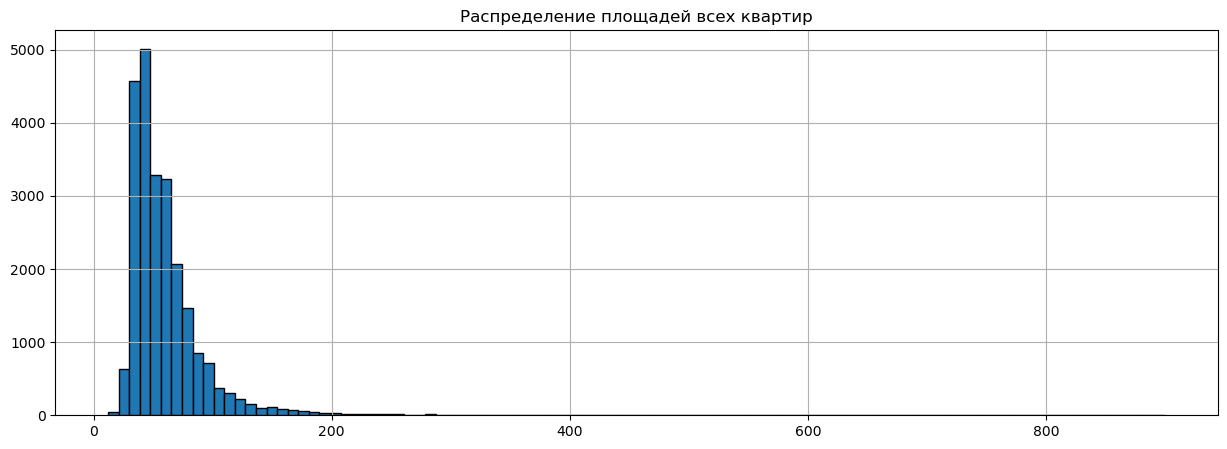

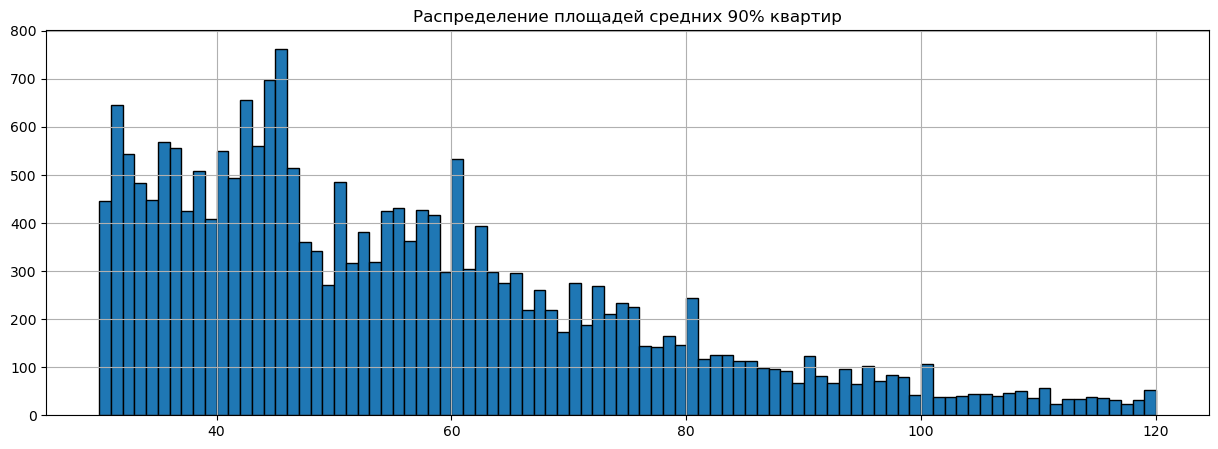

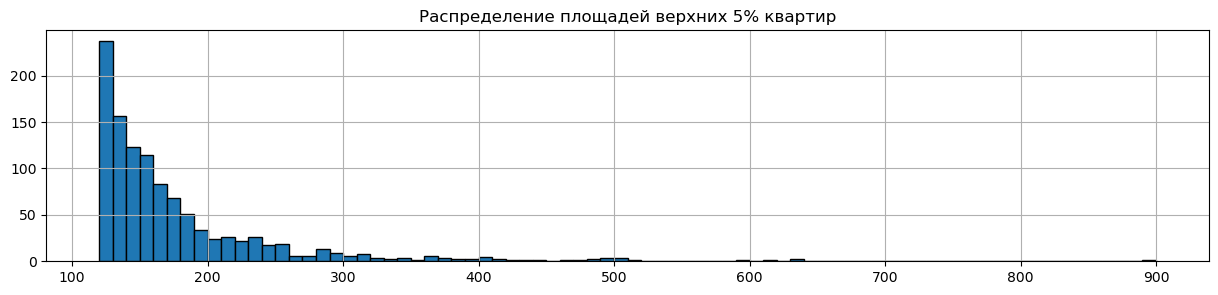

In [99]:
 # гистограмма по всему интервалу
df.hist('total_area', bins=100, ec='black', figsize=(15,5)) 
plt.title('Распределение площадей всех квартир')
plt.show()
# гистограмма по средним 90%
df.hist('total_area', bins=90, ec='black', range =(30, 120), figsize=(15,5))
plt.title('Распределение площадей средних 90% квартир')
plt.show()
# гистограмма по верхним 5%
df.hist('total_area', bins=78, ec='black', range =(120, 900), figsize=(15,3))
plt.title('Распределение площадей верхних 5% квартир')
plt.show()

Диаграмма размаха площади квартиры


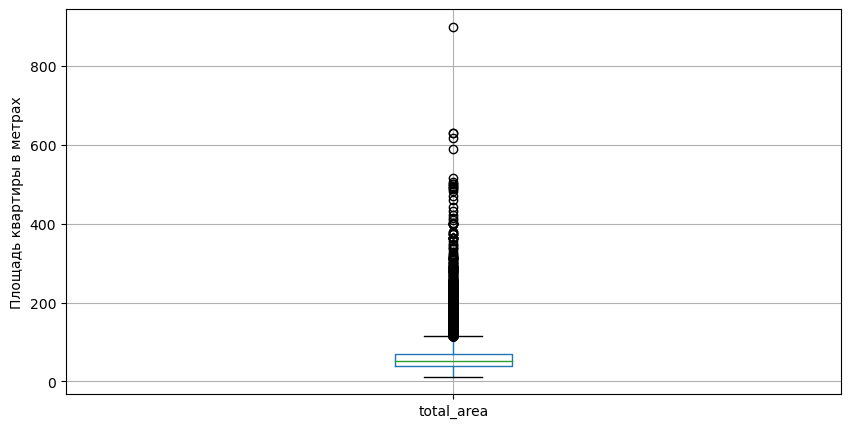

In [100]:
print('Диаграмма размаха площади квартиры')
df.boxplot(column=['total_area'], figsize=(10,5), grid=True)
plt.ylabel('Площадь квартиры в метрах')
plt.show()

**3.1.2. Жилая площадь**

In [101]:
df['living_area'].describe()

count   23686.00
mean       47.33
std        35.60
min        -1.00
25%        27.00
50%        39.00
75%        56.80
max       887.00
Name: living_area, dtype: float64

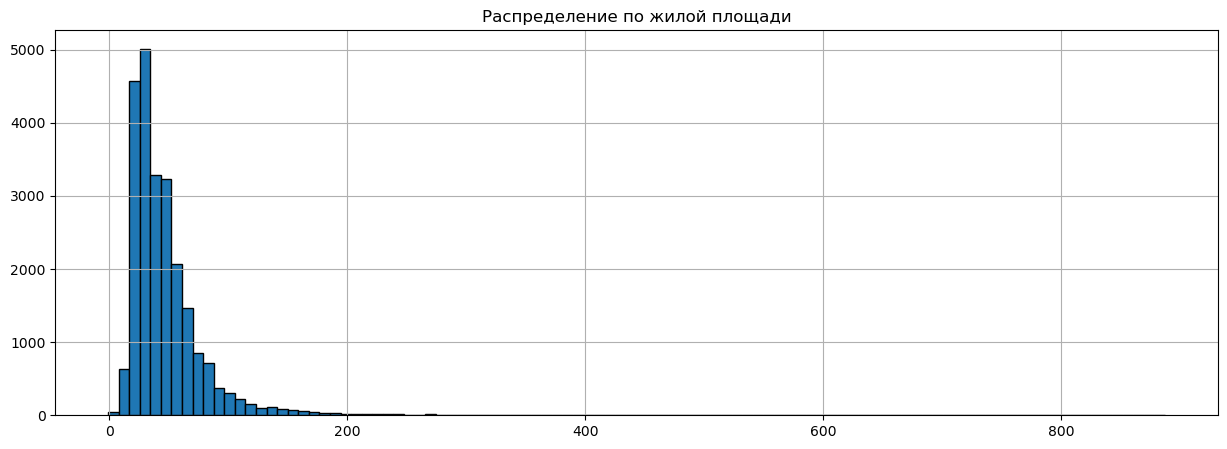

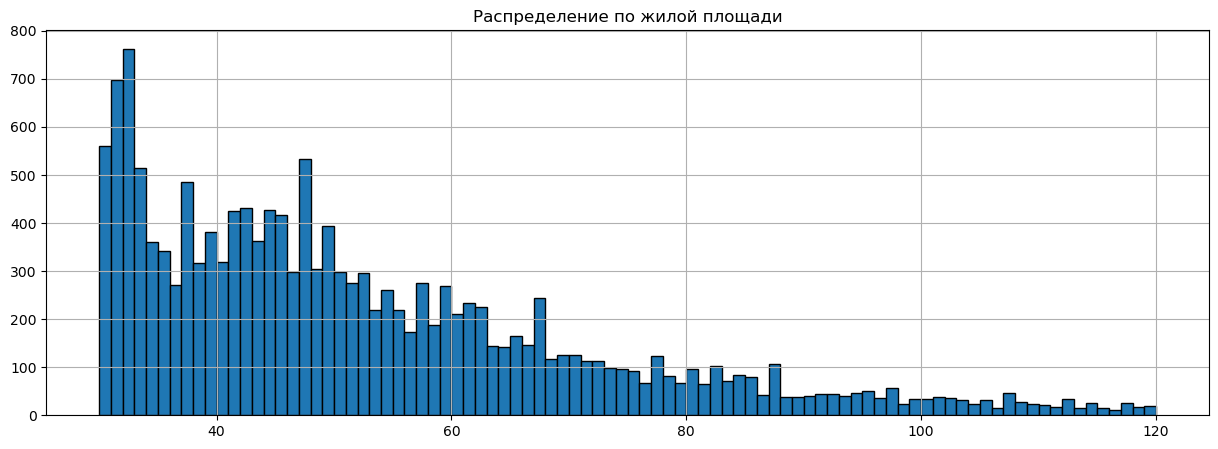

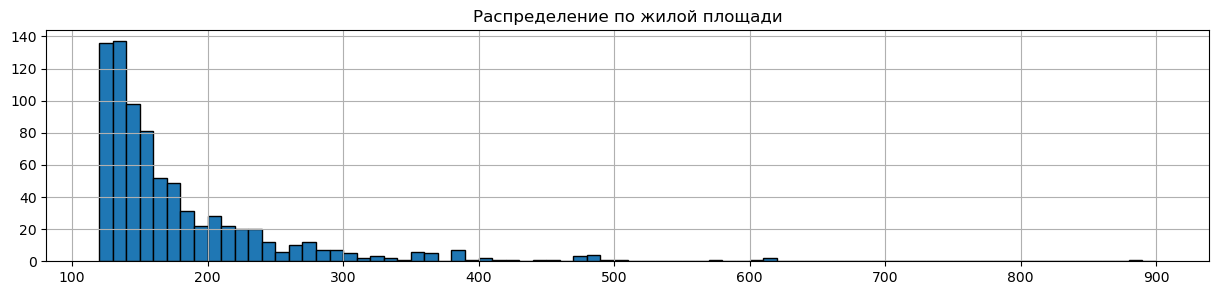

In [102]:
 # гистограмма по всему интервалу
df.hist('living_area', bins=100, ec='black', figsize=(15,5)) 
plt.title('Распределение по жилой площади')
plt.show()
# гистограмма по средним 90%
df.hist('living_area', bins=90, ec='black', range =(30, 120), figsize=(15,5))
plt.title('Распределение по жилой площади')
plt.show()
# гистограмма по верхним 5%
df.hist('living_area', bins=78, ec='black', range =(120, 900), figsize=(15,3))
plt.title('Распределение по жилой площади')
plt.show()

Диаграмма размаха жилой площади


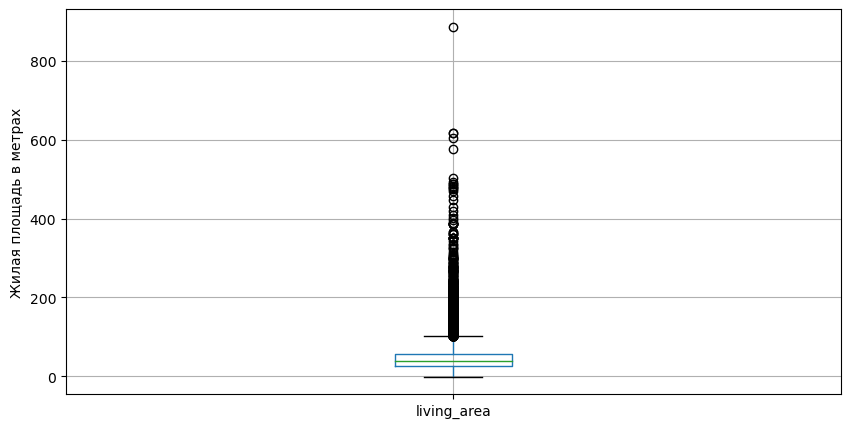

In [103]:
print('Диаграмма размаха жилой площади')
df.boxplot(column=['living_area'], figsize=(10,5), grid=True)
plt.ylabel('Жилая площадь в метрах')
plt.show()

In [104]:
len(df[df['living_area'] < 8])
#len(df[df['living_area'] > 500])
df['living_area'].describe()

count   23686.00
mean       47.33
std        35.60
min        -1.00
25%        27.00
50%        39.00
75%        56.80
max       887.00
Name: living_area, dtype: float64

In [105]:
#df[df['living_area'] > 500]
#df = df.loc[(df["living_area"] > 8)]
df[df['living_area'] >= 8]
#df['living_area'].describe()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_center,price_sq_m,week_day,month,year,floor_type,km_from_center
0,0,20,13000000,108.00,2019-03-07,3,2.70,16,95.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1,482.00,2,755.00,NaN,спальный район спб,120370,3,3,2019,другой,16.00
1,1,7,3350000,40.40,2018-12-04,1,2.68,11,27.40,1,False,False,False,11.00,2,Шушары,12817.00,18603.00,0,NaN,0,NaN,81.00,ленобласть,82920,1,12,2018,первый,19.00
2,2,10,5196000,56.00,2015-08-20,2,2.71,5,43.00,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1,90.00,2,574.00,558.00,спальный район спб,92785,3,8,2015,другой,14.00
3,3,0,64900000,159.00,2015-07-24,3,3.09,14,146.00,9,False,False,False,9.10,0,Санкт-Петербург,28098.00,6800.00,2,84.00,3,234.00,424.00,центр спб,408176,4,7,2015,другой,7.00
4,4,2,10000000,100.00,2018-06-19,2,3.03,14,87.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2,112.00,1,48.00,121.00,спальный район спб,100000,1,6,2018,другой,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,23694,9,9700000,133.81,2017-03-21,3,3.70,5,120.81,3,False,False,False,13.83,0,Санкт-Петербург,24665.00,4232.00,1,796.00,3,381.00,NaN,центр спб,72490,1,3,2017,другой,4.00
23694,23695,14,3100000,59.00,2018-01-15,3,NaN,5,46.00,4,False,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.00,None,52542,0,1,2018,другой,NaN
23695,23696,18,2500000,56.70,2018-02-11,2,NaN,3,43.70,1,False,False,False,9.10,0,Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,None,44091,6,2,2018,первый,NaN
23696,23697,13,11475000,76.75,2017-03-28,2,3.00,17,63.75,12,False,False,False,23.30,2,Санкт-Петербург,39140.00,10364.00,2,173.00,3,196.00,602.00,спальный район спб,149511,1,3,2017,другой,10.00


In [106]:
df = df.loc[(df["living_area"] >= 8)]
df['living_area'].describe()

count   23643.00
mean       47.40
std        35.58
min         8.00
25%        27.00
50%        39.00
75%        57.00
max       887.00
Name: living_area, dtype: float64

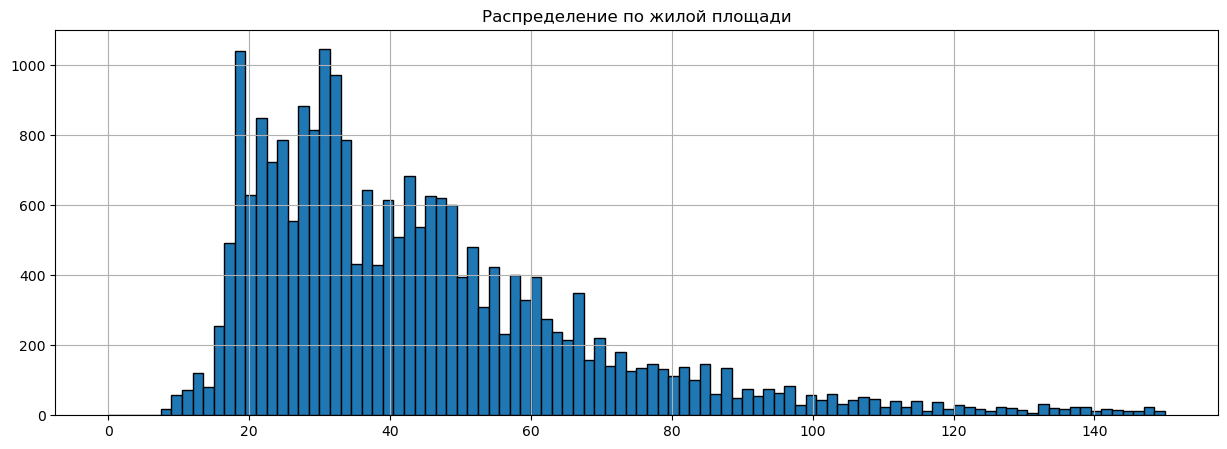

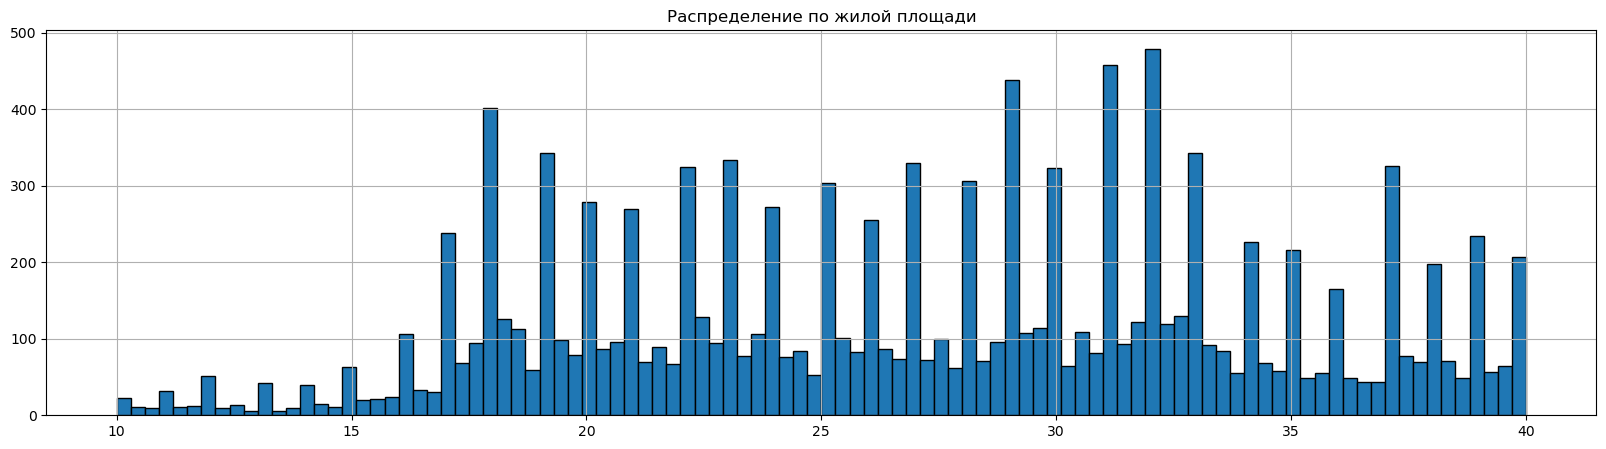

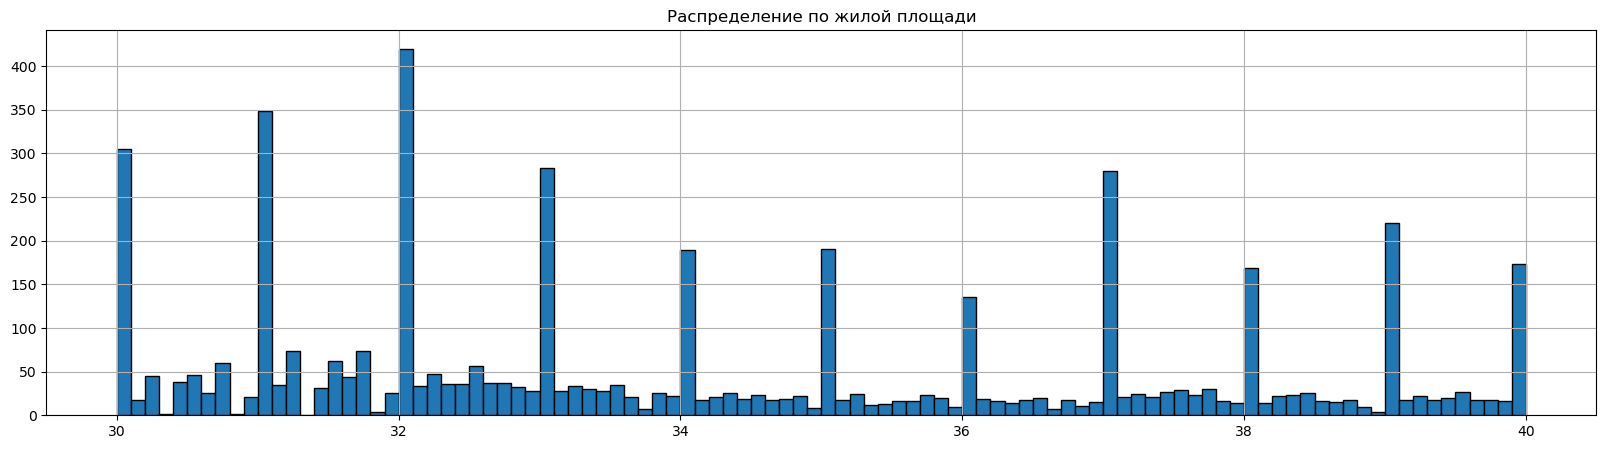

In [107]:
 # гистограмма по всему интервалу
df.hist('living_area', bins=100, ec='black', range =(0, 150), figsize=(15,5)) 
plt.title('Распределение по жилой площади')
plt.show()
 # гистограмма по всему интервалу
df.hist('living_area', bins=100, ec='black', range =(10, 40), figsize=(20,5)) 
plt.title('Распределение по жилой площади')
plt.show()
 # гистограмма по всему интервалу
df.hist('living_area', bins=100, ec='black', range =(30, 40), figsize=(20,5)) 
plt.title('Распределение по жилой площади')
plt.show()

**3.1.3. Площадь кухни**

In [108]:
df['kitchen_area'].describe()

count   23643.00
mean       10.43
std         5.63
min         1.30
25%         7.30
50%         9.10
75%        11.50
max       112.00
Name: kitchen_area, dtype: float64

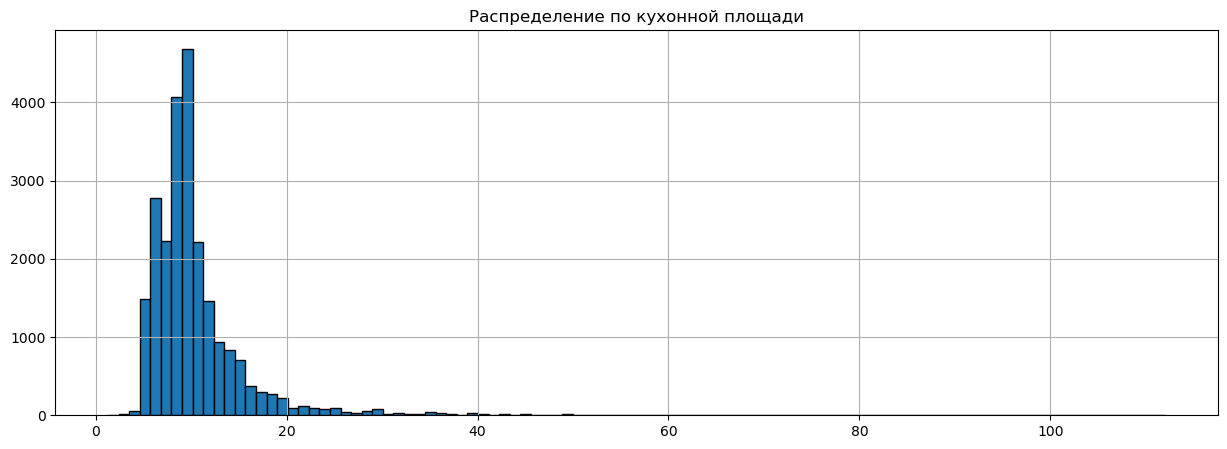

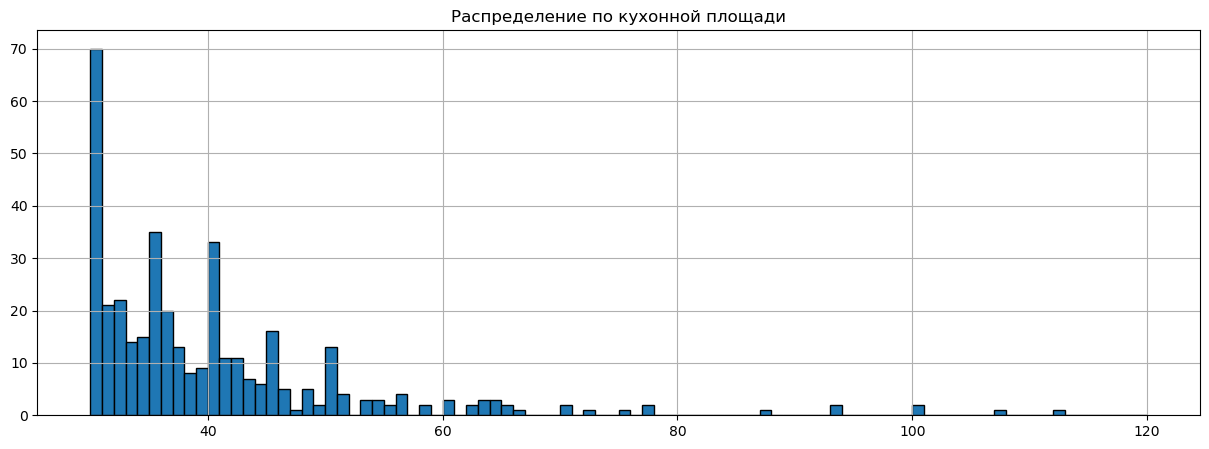

In [109]:
 # гистограмма по всему интервалу
df.hist('kitchen_area', bins=100, ec='black', figsize=(15,5)) 
plt.title('Распределение по кухонной площади')
plt.show()
# гистограмма по средним 90%
df.hist('kitchen_area', bins=90, ec='black', range =(30, 120), figsize=(15,5))
plt.title('Распределение по кухонной площади')
plt.show()

Диаграмма размаха кухонной площади


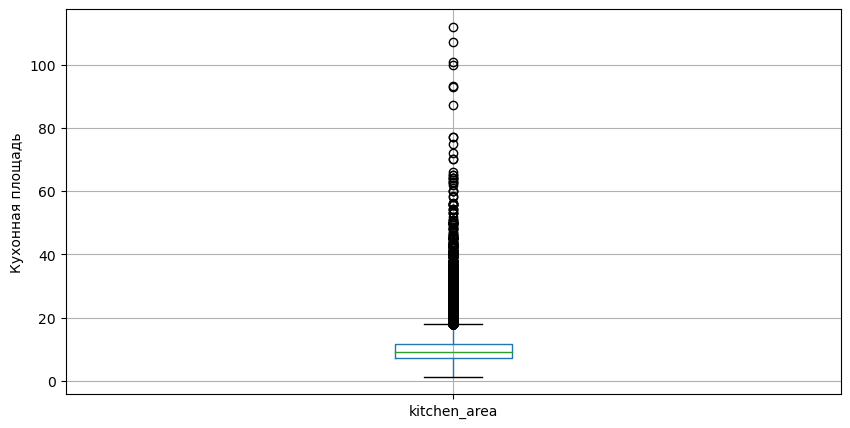

In [110]:
print('Диаграмма размаха кухонной площади')
df.boxplot(column=['kitchen_area'], figsize=(10,5), grid=True)
plt.ylabel('Кухонная площадь')
plt.show()

In [111]:
df[df['kitchen_area'] > 80]
df = df[df.kitchen_area < 80 ]

In [112]:
df[df['kitchen_area'] < 5]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_center,price_sq_m,week_day,month,year,floor_type,km_from_center
76,76,12,2800000,55.10,2016-05-14,3,NaN,5,42.10,1,False,False,False,4.90,0,Кировск,NaN,NaN,0,NaN,0,NaN,606.00,None,50816,5,5,2016,первый,NaN
298,298,9,2650000,42.80,2017-04-25,2,NaN,5,29.80,3,False,False,False,4.50,0,Гатчина,NaN,NaN,0,NaN,0,NaN,49.00,None,61915,1,4,2017,другой,NaN
422,422,8,1700000,55.20,2018-03-24,3,NaN,5,42.20,5,False,False,False,4.50,0,Кириши,NaN,NaN,0,NaN,0,NaN,NaN,None,30797,5,3,2018,последний,NaN
906,906,15,2600000,27.00,2017-07-10,1,2.75,23,14.00,18,False,False,False,2.00,0,Санкт-Петербург,22131.00,17459.00,0,NaN,1,411.00,10.00,спальный район спб,96296,0,7,2017,другой,17.00
1327,1327,6,2650000,46.20,2016-12-01,2,NaN,5,33.20,5,False,False,False,4.90,0,Гатчина,NaN,NaN,0,NaN,0,NaN,704.00,None,57359,3,12,2016,последний,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22838,22839,14,3350000,27.00,2018-11-03,1,2.70,16,14.00,6,False,False,False,4.00,2,Санкт-Петербург,41935.00,9551.00,0,NaN,0,NaN,35.00,спальный район спб,124074,5,11,2018,другой,10.00
22848,22849,6,2380000,25.00,2016-03-22,1,2.68,25,12.00,15,False,False,False,4.00,1,Шушары,13461.00,19247.00,0,NaN,1,351.00,140.00,ленобласть,95200,1,3,2016,другой,19.00
23109,23110,1,2900000,34.00,2018-02-01,2,2.90,2,21.00,1,False,False,False,4.00,0,Стрельна,27006.00,23832.00,0,NaN,2,872.00,196.00,ленобласть,85294,3,2,2018,первый,24.00
23497,23498,7,1600000,54.00,2016-12-26,2,NaN,1,41.00,1,False,False,False,3.50,0,Высоцк,NaN,NaN,0,NaN,0,NaN,281.00,None,29629,0,12,2016,первый,NaN


In [113]:
df.loc[df['kitchen_area'] < 5, 'kitchen_area'] = 5
#df[df['kitchen_area'] < 5]
df['kitchen_area'].describe()

count   23636.00
mean       10.41
std         5.41
min         5.00
25%         7.30
50%         9.10
75%        11.45
max        77.00
Name: kitchen_area, dtype: float64

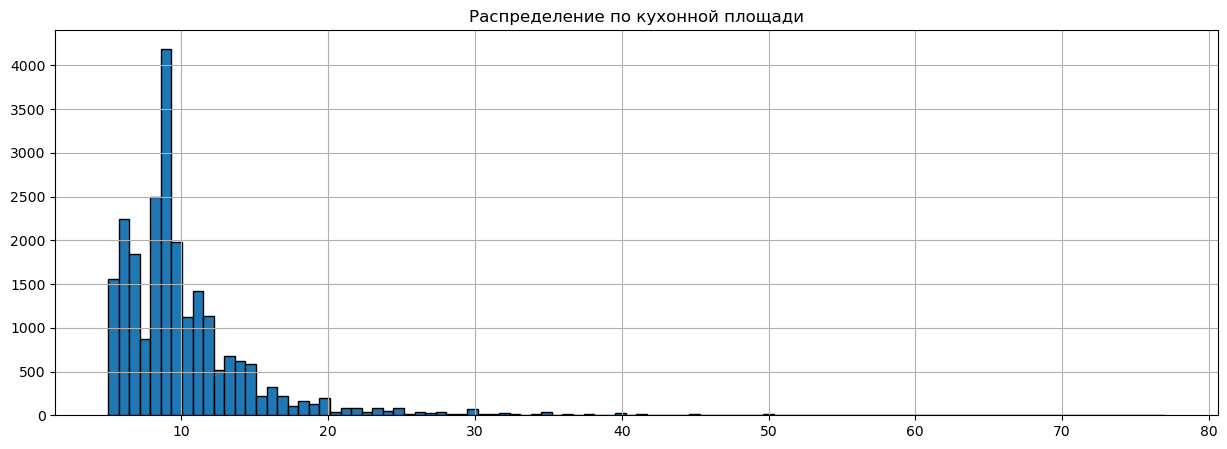

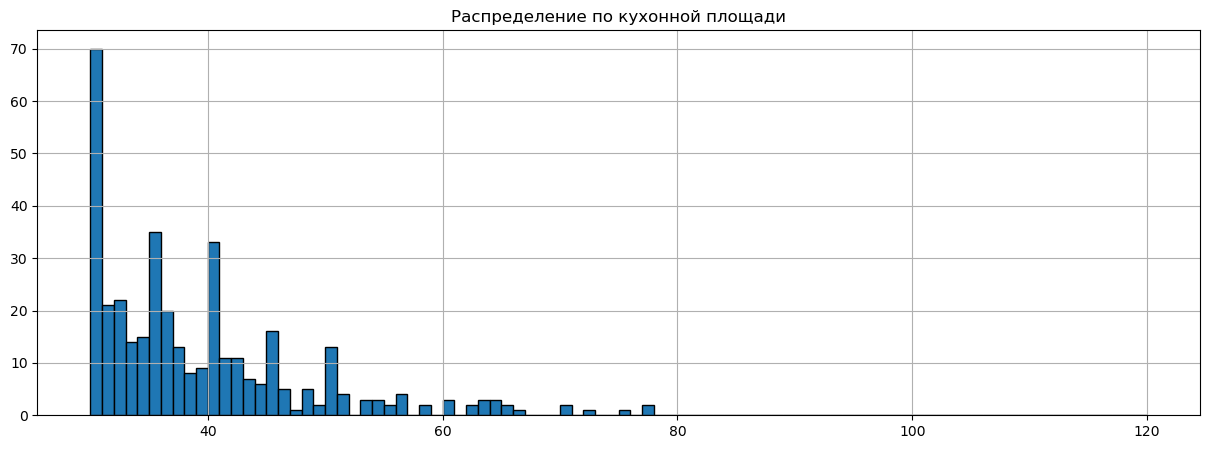

In [114]:
 # гистограмма по всему интервалу
df.hist('kitchen_area', bins=100, ec='black', figsize=(15,5)) 
plt.title('Распределение по кухонной площади')
plt.show()
# гистограмма по средним 90%
df.hist('kitchen_area', bins=90, ec='black', range =(30, 120), figsize=(15,5))
plt.title('Распределение по кухонной площади')
plt.show()

Диаграмма размаха кухонной площади


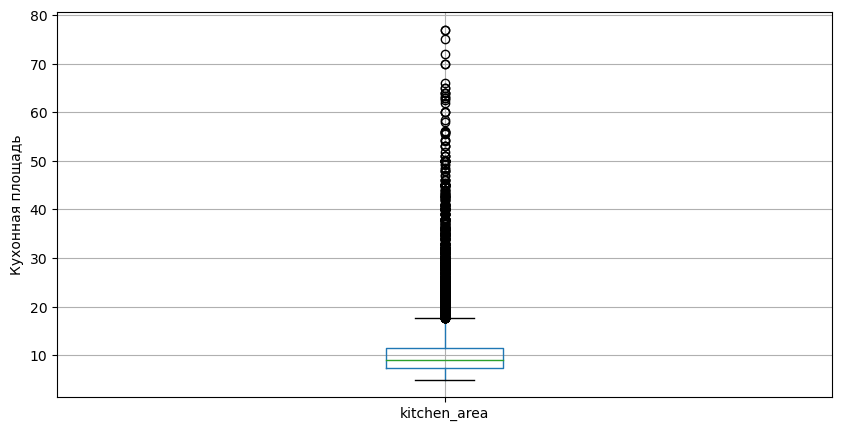

In [115]:
print('Диаграмма размаха кухонной площади')
df.boxplot(column=['kitchen_area'], figsize=(10,5), grid=True)
plt.ylabel('Кухонная площадь')
plt.show()

**3.1.4. Цена объекта**

In [116]:
df['last_price'].describe()

count       23636.00
mean      6516291.01
std      10511030.35
min         12190.00
25%       3435000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

In [117]:
#df[df['last_price'] == 12190]
#убираем строку, где значение в столбце "total_area" = 12190
df = df[df.last_price != 12190.00 ]
df['last_price'].describe()

count       23635.00
mean      6516566.20
std      10511167.57
min        430000.00
25%       3437100.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

In [118]:
df['last_price'] = df['last_price'] / 1000
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_center,price_sq_m,week_day,month,year,floor_type,km_from_center
0,0,20,13000.00,108.00,2019-03-07,3,2.70,16,95.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1,482.00,2,755.00,NaN,спальный район спб,120370,3,3,2019,другой,16.00
1,1,7,3350.00,40.40,2018-12-04,1,2.68,11,27.40,1,False,False,False,11.00,2,Шушары,12817.00,18603.00,0,NaN,0,NaN,81.00,ленобласть,82920,1,12,2018,первый,19.00
2,2,10,5196.00,56.00,2015-08-20,2,2.71,5,43.00,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1,90.00,2,574.00,558.00,спальный район спб,92785,3,8,2015,другой,14.00
3,3,0,64900.00,159.00,2015-07-24,3,3.09,14,146.00,9,False,False,False,9.10,0,Санкт-Петербург,28098.00,6800.00,2,84.00,3,234.00,424.00,центр спб,408176,4,7,2015,другой,7.00
4,4,2,10000.00,100.00,2018-06-19,2,3.03,14,87.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2,112.00,1,48.00,121.00,спальный район спб,100000,1,6,2018,другой,8.00


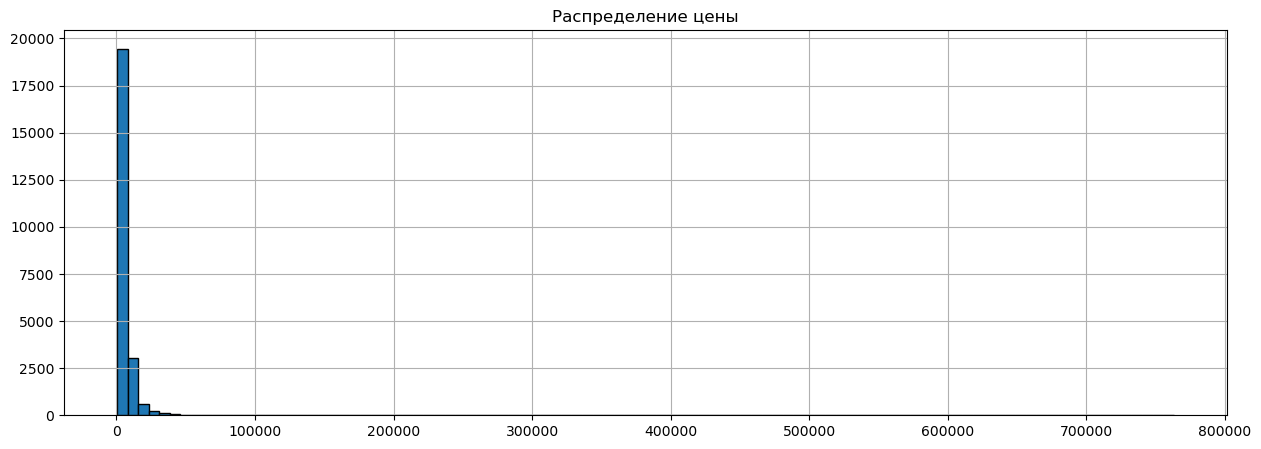

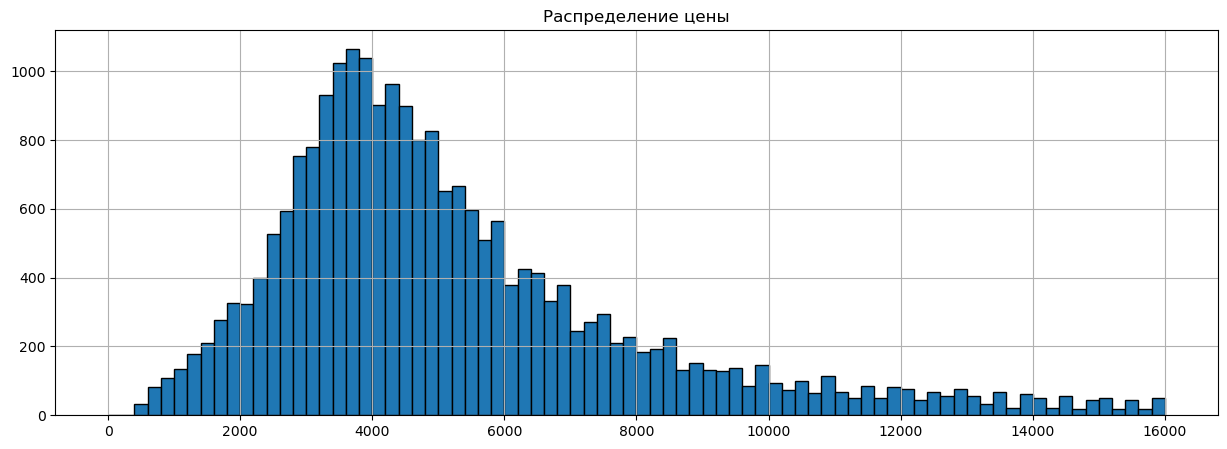

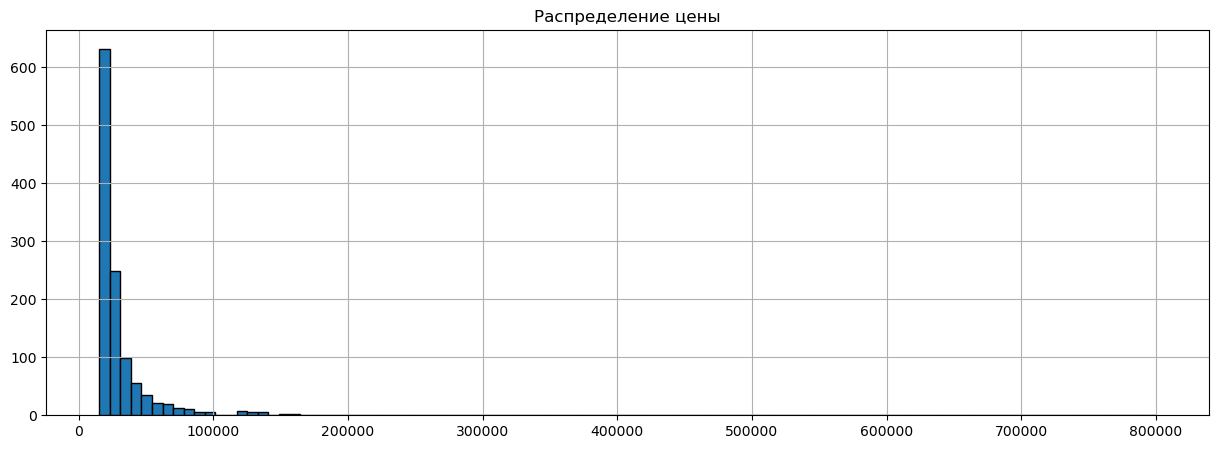

In [119]:
# общие данные
#display(df.last_price.describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99]))
# гистограмма по всем объектам
df.hist('last_price', bins=100, ec='black', figsize=(15, 5))
plt.title('Распределение цены')
plt.show()
# гистограмма по 95% 
df.hist('last_price', bins=80, ec='black', figsize=(15, 5), range=(0, 16000))
plt.title('Распределение цены')
plt.show()
# гистограмма по верхним 5%
df.hist('last_price', bins=100, ec='black', figsize=(15, 5), range=(15300, 800000))
plt.title('Распределение цены')
plt.show()

In [120]:
df[df['last_price'] > 100000]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_center,price_sq_m,week_day,month,year,floor_type,km_from_center
793,793,20,135000.00,310.00,2018-05-22,4,3.30,5,297.00,2,False,False,False,50.00,0,Санкт-Петербург,34159.00,7251.00,2,295.00,3,190.00,342.00,центр спб,435483,1,5,2018,другой,7.00
1026,1026,20,155000.00,310.00,2018-10-12,5,5.30,3,297.00,3,False,False,False,63.00,2,Санкт-Петербург,24899.00,4785.00,0,NaN,1,603.00,NaN,центр спб,500000,4,10,2018,последний,5.00
1188,1188,20,118000.00,290.60,2018-06-01,6,3.82,6,277.60,3,False,False,False,22.00,1,Санкт-Петербург,25309.00,6224.00,1,217.00,0,NaN,316.00,центр спб,406056,4,6,2018,другой,6.00
1300,1300,14,120000.00,280.00,2018-07-12,5,4.70,4,267.00,3,False,False,False,30.00,0,Санкт-Петербург,24680.00,4247.00,1,464.00,3,339.00,225.00,центр спб,428571,3,7,2018,другой,4.00
1436,1436,19,330000.00,190.00,2018-04-04,3,3.50,7,177.00,5,False,False,False,40.00,0,Санкт-Петербург,23011.00,1197.00,3,519.00,3,285.00,233.00,исторический центр спб,1736842,2,4,2018,другой,1.00
1928,1928,11,125000.00,224.50,2017-01-24,4,3.09,4,211.50,3,False,False,False,30.00,1,Санкт-Петербург,22805.00,2335.00,0,NaN,2,497.00,174.00,центр спб,556792,1,1,2017,другой,2.00
2243,2243,9,130278.28,304.00,2015-07-24,5,3.11,9,291.00,7,False,False,False,9.10,0,Санкт-Петербург,25593.00,5913.00,2,164.00,0,NaN,599.00,центр спб,428546,4,7,2015,другой,6.00
2536,2536,16,159984.00,242.40,2015-08-27,4,3.85,9,229.40,7,False,False,False,20.00,0,Санкт-Петербург,21946.00,2242.00,1,679.00,1,227.00,501.00,центр спб,660000,3,8,2015,другой,2.00
3117,3117,19,140000.00,631.00,2019-03-30,7,3.09,5,618.00,5,False,False,False,60.00,0,Санкт-Петербург,25707.00,4972.00,0,NaN,2,210.00,NaN,центр спб,221870,5,3,2019,последний,5.00
4996,4996,20,124000.00,124.50,2017-10-12,4,3.00,4,111.50,2,False,False,False,20.00,0,Санкт-Петербург,20399.00,1722.00,3,302.00,3,172.00,45.00,исторический центр спб,995983,3,10,2017,другой,2.00


1. Распределение цен основной массы квартир - ожидаемое. Средняя стоимость - 6.5 млн, медианная - 4.65 млн. За сдвиг судя по всему, ответственны высокие значения - выше 34 млн. Выше 100 млн встречаются единичные объекты с большой площадью и максимальной стоимостью м2. 
2. Есть странность в виде минимального значения в 12190, удалим это значение из выборки. Ошибка скорее всего возникла по ошибке пользователя при вводе данных.
Теперь минимальное значение 430000, что тоже мало, но вполне реально, если речь идет про какое-то минимальное пространство на краю ленобласти, возможно в коммуналке или общежитие.
3. Отбросим три 0 для более удобного отображения данных и проверим их отображение.

**3.1.5. Количество комнат**

In [121]:
display(df.rooms.describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99])) # общие данные
print(f"Корреляция между размером квартиры и количеством комнат {df['total_area'].corr(df['rooms']):.2f}") 

count   23635.00
mean        2.07
std         1.07
min         0.00
5%          1.00
25%         1.00
50%         2.00
95%         4.00
99%         5.00
max        19.00
Name: rooms, dtype: float64

Корреляция между размером квартиры и количеством комнат 0.76


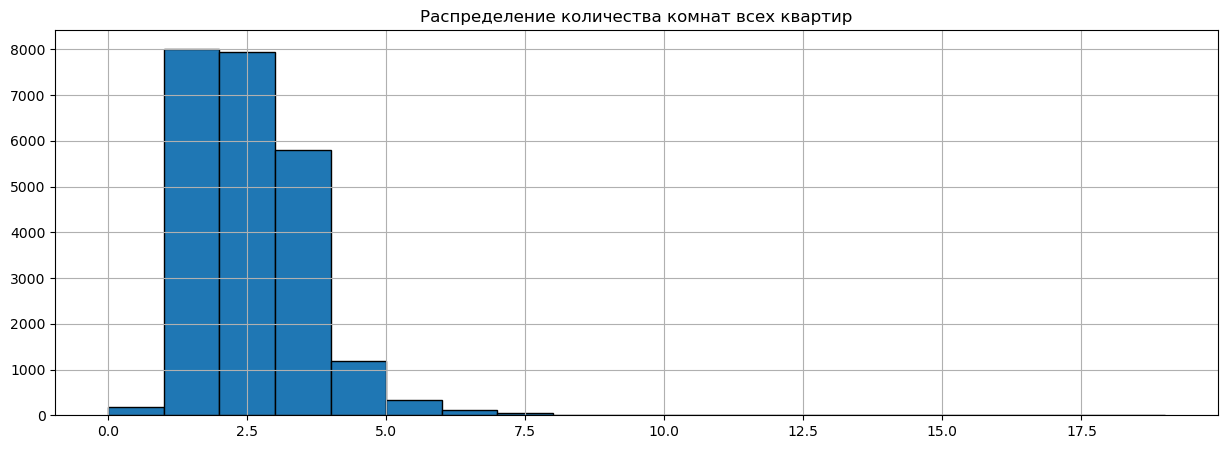

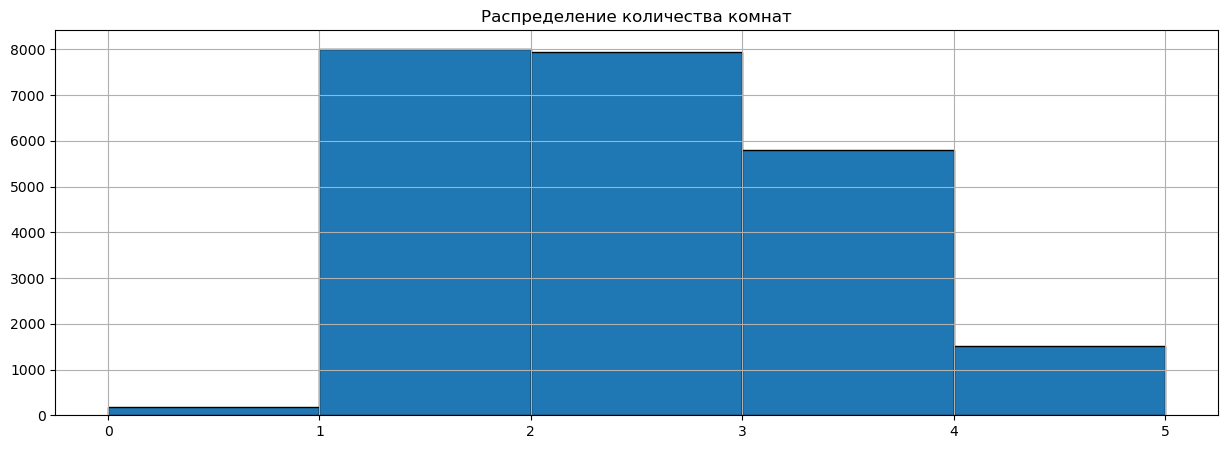

In [122]:
df.hist('rooms', bins=19, ec='black', figsize=(15,5)) # гистограмма по всем объектам
plt.title('Распределение количества комнат всех квартир')
plt.show()
df.hist('rooms', bins=5, ec='black', figsize=(15,5), range=(0, 5)) 
plt.title('Распределение количества комнат')
plt.show()

Распределение комнатности тоже вполне ожидаемое - большинство объектов до 5 комнат, есть несколько от 6, их менее 1% объектов - это опять-таки можно объяснить существованием и относительной популярностью в Спб коммунальных квартир. Встречаются и объекты с количеством комнат 10+, но это отдельные, выдающиеся случаи.Корреляция между количеством комнат и площадью квартир высокая. Вполне объяснимо, в большинстве случаев чем больше помещений в квартире, тем больше должна быть ее общая площадь. Больше всего на продажу выставлялись однушки, двушки и трешки.

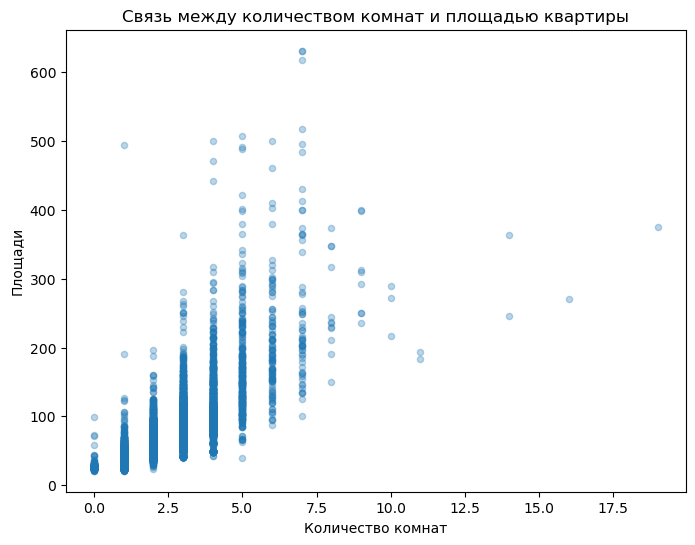

In [123]:
# соотношение площадей и количества комнат
df.plot.scatter(x='rooms', y='total_area', figsize=(8,6), alpha=0.3)
plt.xlabel('Количество комнат')
plt.ylabel('Площади')
plt.title('Связь между количеством комнат и площадью квартиры')
plt.show()

Заметны выбивающиеся точки, например однушка в 500 м2. Также начиная от 8 комнат выборки слишком мелкие и потому не достоверные.Посчитаем, какие площади с вероятностью 95% встречаются среди квартир одной комнатности.

In [124]:
room_info = pd.DataFrame(zip(df.groupby('rooms')['total_area'].quantile(q=0.95), df.groupby('rooms')['rooms'].count()))
room_info = room_info.rename(columns={0:'95%', 1:'count'})
room_info.index = sorted(df.rooms.unique())
room_info = room_info[['count', '95%']]
room_info # табличка с двумя столбцами - количеством квартир каждой комнатности и их наиболее вероятная площадь

,count,95%
0,184,35.00
1,8014,49.84
2,7933,80.00
3,5805,120.00
4,1180,180.81
5,326,289.50
6,105,325.76
7,59,527.10
8,12,359.02
9,8,399.30


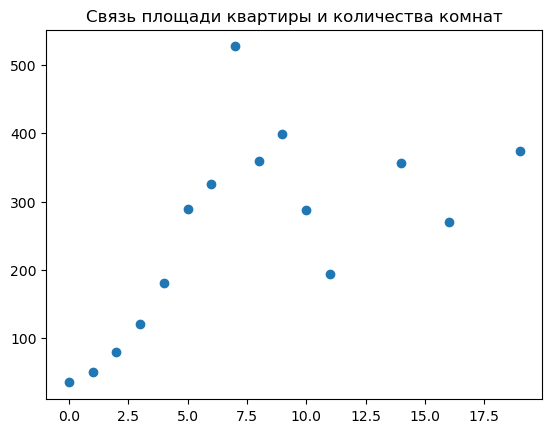

In [125]:
# еще раз посмотрим на распределение
x=room_info.index
plt.scatter(x, room_info['95%'])
plt.title('Связь площади квартиры и количества комнат')
plt.show()

 Действительно, положительная корреляция более заметна среди квартир до 7 комнат - а дальше при выборке из менее чем 50 объектов в каждой категории говорить о закономерностях не приходится.

**3.1.6. Высота потолков**

Посмотрим на распределение высот потолков, после замены пропусков.

In [126]:
# общие данные
display(df.ceiling_height.describe(percentiles=[0.05, 1/4, 1/2, 0.95]))

count   18139.00
mean        2.78
std         0.99
min         1.00
5%          2.50
25%         2.60
50%         2.71
95%         3.20
max       100.00
Name: ceiling_height, dtype: float64

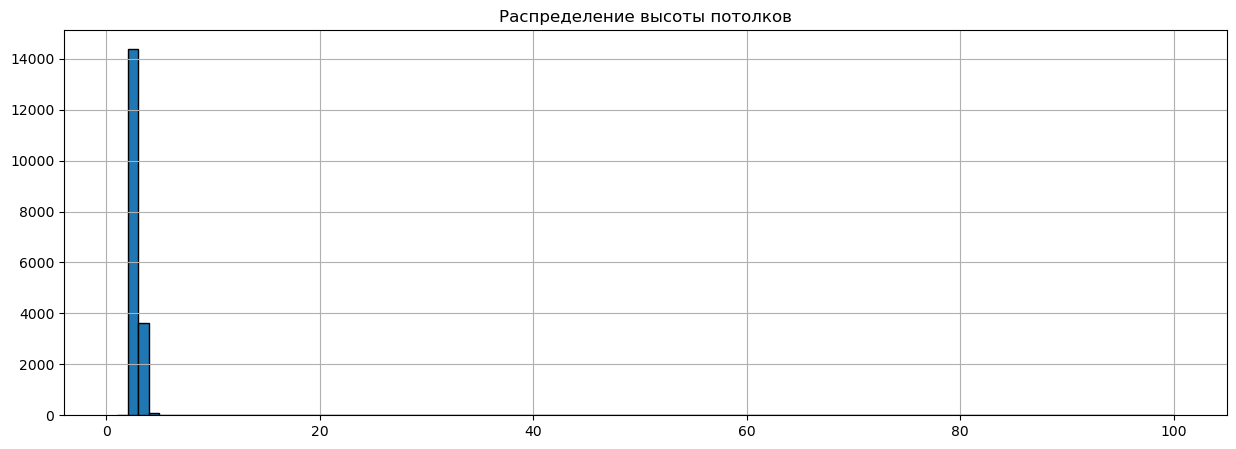

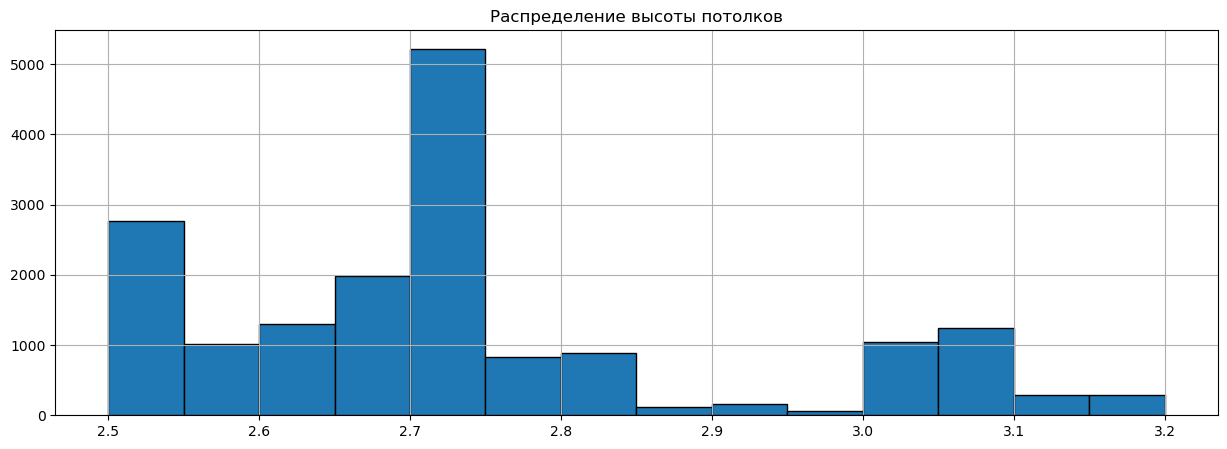

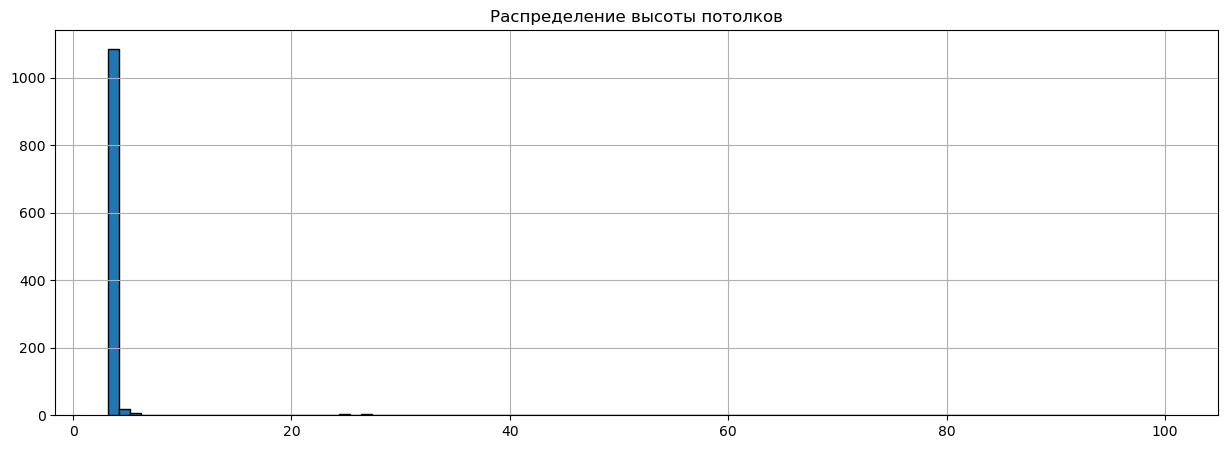

In [127]:
# гистограмма по всем объектам
df.hist('ceiling_height', bins=100, ec='black', figsize=(15, 5))
plt.title('Распределение высоты потолков')
plt.show()
# гистограмма по средним 
df.hist('ceiling_height', bins=14, ec='black', figsize=(15, 5), range=(2.5, 3.2))
plt.title('Распределение высоты потолков')
plt.show()
# гистограмма по верхним 
df.hist('ceiling_height', bins=96, ec='black', figsize=(15, 5), range=(3.2, 100))
plt.title('Распределение высоты потолков')
plt.show()

In [128]:
df[df['ceiling_height'] < 2]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_center,price_sq_m,week_day,month,year,floor_type,km_from_center
16934,16934,5,4100.00,40.00,2017-10-17,1,1.75,37,27.00,5,False,False,False,8.34,0,Санкт-Петербург,18732.00,20444.00,0,NaN,3,80.00,71.00,ленобласть,102500,1,10,2017,другой,20.00
22589,22590,16,6000.00,55.00,2018-10-31,2,1.00,12,42.00,7,False,False,False,10.00,0,Санкт-Петербург,33053.00,14217.00,2,293.00,2,289.00,13.00,спальный район спб,109090,2,10,2018,другой,14.00


In [129]:
df[df['ceiling_height'] > 10]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_center,price_sq_m,week_day,month,year,floor_type,km_from_center
4643,4643,0,4300.00,45.00,2018-02-01,2,25.00,9,32.00,2,False,False,False,7.00,1,Санкт-Петербург,12016.00,13256.00,1,658.00,1,331.00,181.00,спальный район спб,95555,3,2,2018,другой,13.00
5076,5076,0,3850.00,30.50,2018-10-03,1,24.00,5,17.50,1,True,False,False,5.50,0,Санкт-Петербург,29686.00,8389.00,3,397.00,1,578.00,7.00,спальный район спб,126229,2,10,2018,первый,8.00
5669,5669,4,4400.00,50.00,2017-08-08,2,26.00,9,37.00,3,False,False,False,7.00,2,Санкт-Петербург,28981.00,10912.00,1,305.00,0,NaN,267.00,спальный район спб,88000,1,8,2017,другой,11.00
5807,5807,17,8150.00,80.00,2019-01-09,2,27.00,36,67.00,13,False,False,False,12.00,5,Санкт-Петербург,18732.00,20444.00,0,NaN,3,80.00,38.00,ленобласть,101875,2,1,2019,другой,20.00
6246,6246,6,3300.00,44.40,2019-03-25,2,25.00,5,31.40,5,False,False,False,5.70,0,Кронштадт,68923.00,50649.00,1,417.00,2,73.00,NaN,ленобласть,74324,0,3,2019,последний,51.00
9379,9379,5,3950.00,42.00,2017-03-26,3,25.00,5,29.00,2,False,False,False,5.20,0,Санкт-Петербург,11647.00,13581.00,0,NaN,0,NaN,NaN,спальный район спб,94047,6,3,2017,другой,14.00
15061,15061,19,5600.00,56.40,2018-05-11,2,14.00,14,43.40,5,False,False,False,9.10,2,Санкт-Петербург,14814.00,13610.00,0,NaN,0,NaN,315.00,спальный район спб,99290,4,5,2018,другой,14.00
17496,17496,15,6700.00,92.90,2019-02-19,3,20.00,17,79.90,14,False,False,False,12.00,5,Санкт-Петербург,16295.00,15092.00,1,967.00,0,NaN,NaN,спальный район спб,72120,1,2,2019,другой,15.00
17857,17857,1,3900.00,56.00,2017-12-22,3,27.00,5,43.00,4,False,False,False,9.10,0,Санкт-Петербург,41030.00,15543.00,0,NaN,0,NaN,73.00,спальный район спб,69642,4,12,2017,другой,16.00
18545,18545,6,3750.00,43.00,2019-03-18,2,25.00,5,30.00,3,False,False,False,9.10,0,Санкт-Петербург,27054.00,8033.00,1,540.00,0,NaN,12.00,спальный район спб,87209,0,3,2019,другой,8.00


In [130]:
df = df[df.ceiling_height > 2]
df['ceiling_height'].describe()

count   18134.00
mean        2.78
std         0.99
min         2.30
25%         2.60
50%         2.71
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64

In [131]:
df = df[df.ceiling_height < 10]
df['ceiling_height'].describe()

count   18118.00
mean        2.76
std         0.26
min         2.30
25%         2.60
50%         2.71
75%         2.80
max         8.30
Name: ceiling_height, dtype: float64

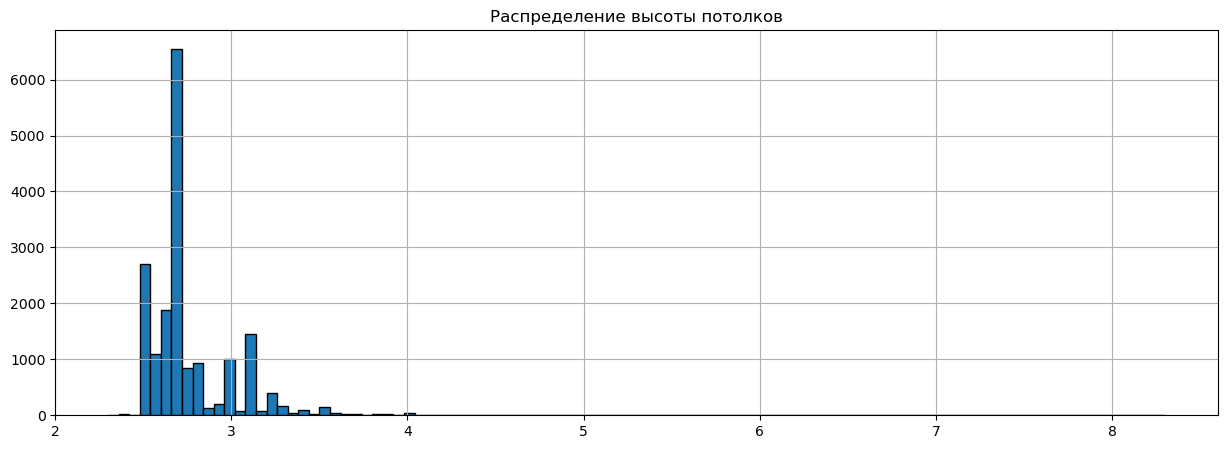

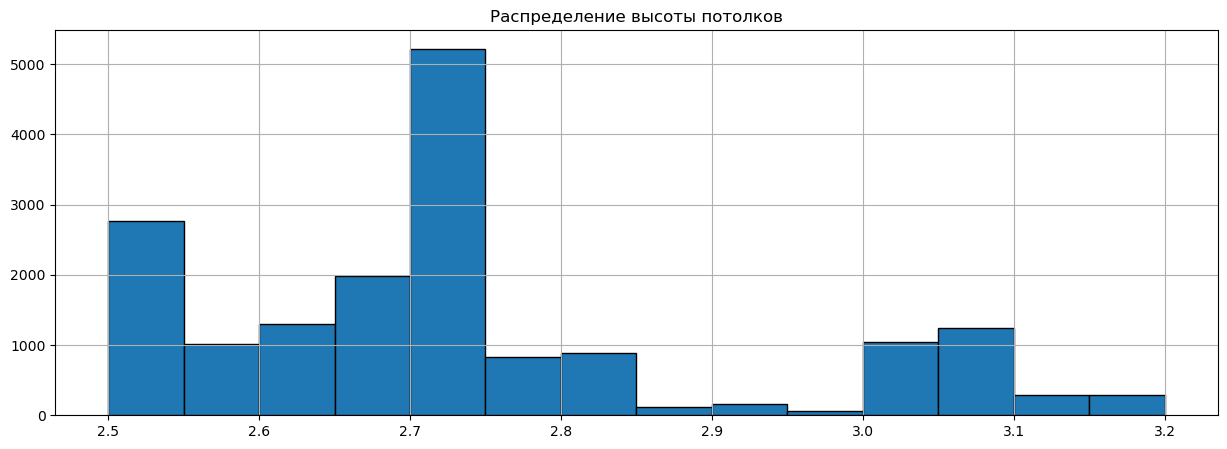

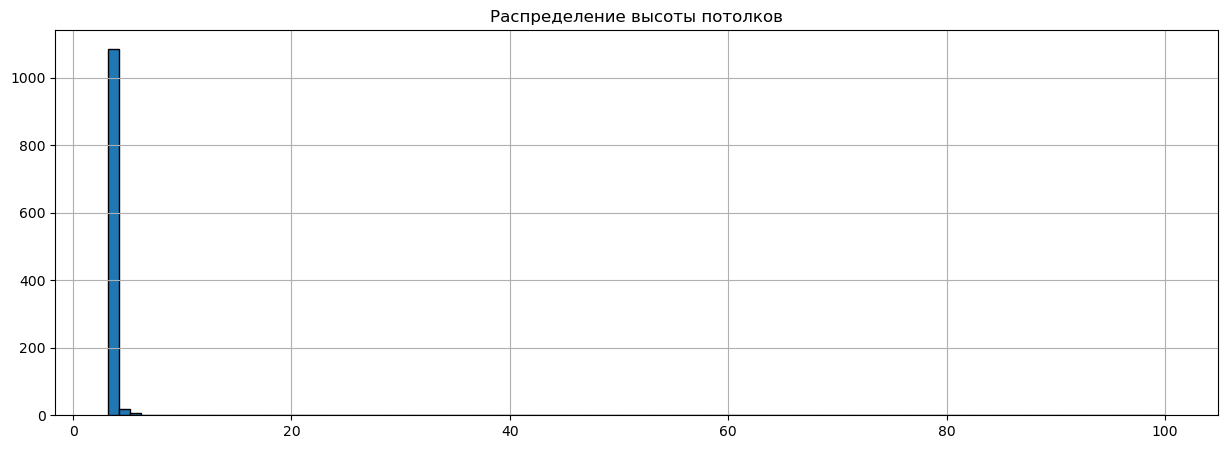

In [132]:
# гистограмма по всем объектам
df.hist('ceiling_height', bins=100, ec='black', figsize=(15, 5))
plt.title('Распределение высоты потолков')
plt.show()
# гистограмма по средним 
df.hist('ceiling_height', bins=14, ec='black', figsize=(15, 5), range=(2.5, 3.2))
plt.title('Распределение высоты потолков')
plt.show()
# гистограмма по верхним 
df.hist('ceiling_height', bins=96, ec='black', figsize=(15, 5), range=(3.2, 100))
plt.title('Распределение высоты потолков')
plt.show()

**3.1.7. Этаж квартиры**

In [133]:
df['floor'].describe()

count   18118.00
mean        6.14
std         4.95
min         1.00
25%         3.00
50%         5.00
75%         8.00
max        33.00
Name: floor, dtype: float64

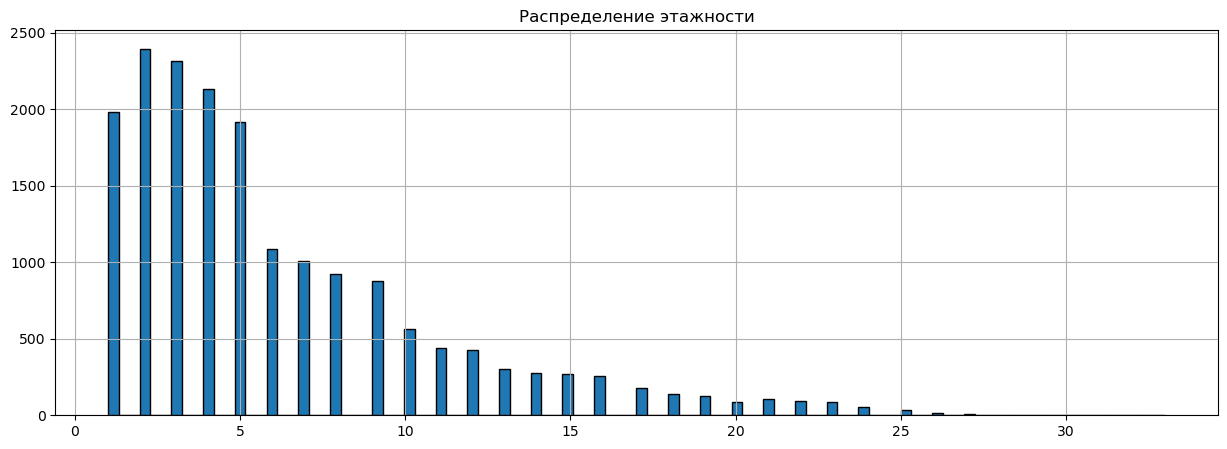

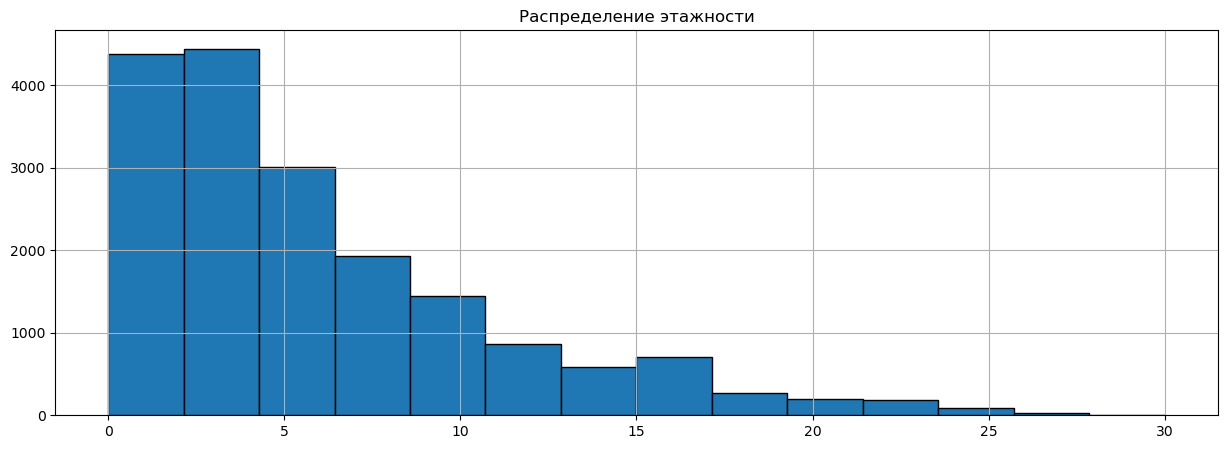

In [134]:
 # гистограмма по всему интервалу
df.hist('floor', bins=100, ec='black', figsize=(15, 5))
plt.title('Распределение этажности')
plt.show()
# гистограмма по средним 
df.hist('floor', bins=14, ec='black', figsize=(15, 5), range=(0, 30))
plt.title('Распределение этажности')
plt.show()

Диаграмма этажности


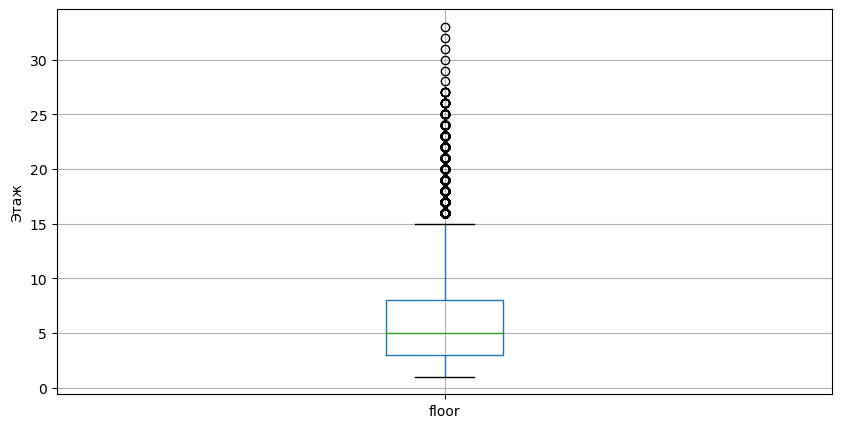

In [135]:
print('Диаграмма этажности')
df.boxplot(column=['floor'], figsize=(10,5), grid=True)
plt.ylabel('Этаж')
plt.show()

Показатели на мой взгляд хорошие, больше всего квартир на продаже с 1 по 5 этажи, полагаю это можно объяснить старым жилым фондом.

**3.1.9. Общее количество этажей в доме**

In [137]:
df['floors_total'].describe()

count   18118.00
mean       11.18
std         6.54
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

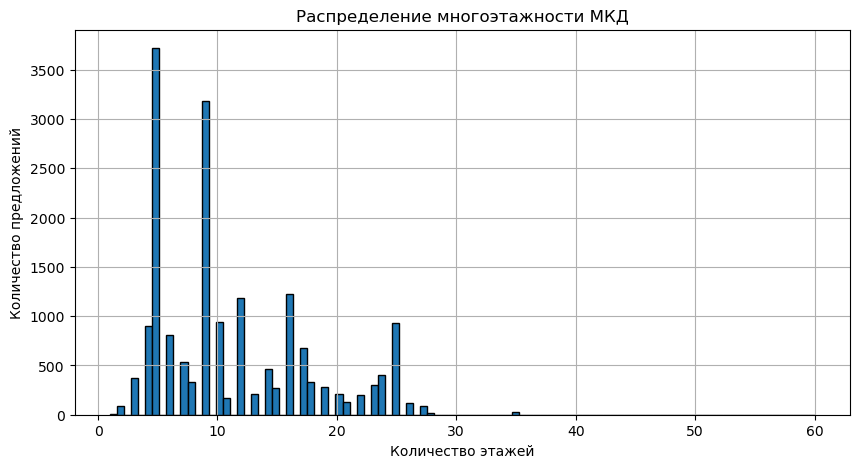

In [138]:
# гистограмма по всем объектам
df.hist('floors_total', bins=100, ec='black', figsize=(10, 5))
plt.title('Распределение многоэтажности МКД')
plt.xlabel('Количество этажей')
plt.ylabel('Количество предложений')
plt.show()

Диаграмма многоэтажности МКД


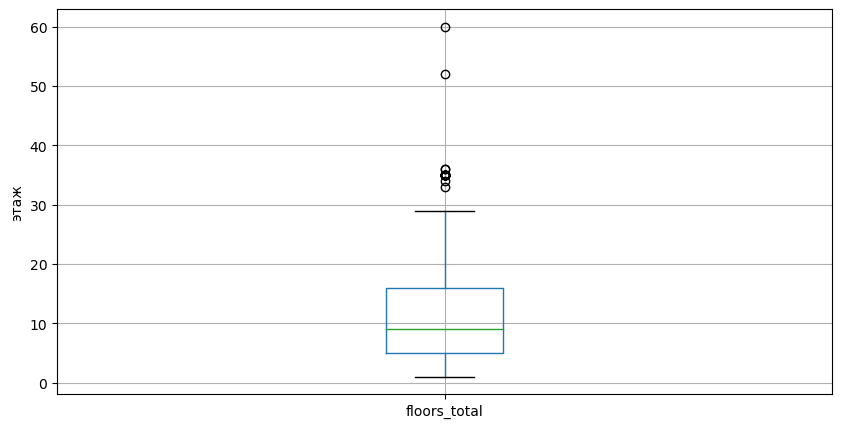

In [139]:
print('Диаграмма многоэтажности МКД')
df.boxplot(column=['floors_total'], figsize=(10,5), grid=True)
plt.ylabel('этаж')
plt.show()

In [140]:
df = df[df.floors_total < 31]
df['floors_total'].describe()

count   18088.00
mean       11.14
std         6.46
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        29.00
Name: floors_total, dtype: float64

**3.1.10. Расстояние до центра города в метрах**

In [141]:
df['km_from_center'].describe()

count   18088.00
mean       14.18
std         8.61
min         0.00
25%         9.00
50%        13.00
75%        16.00
max        66.00
Name: km_from_center, dtype: float64

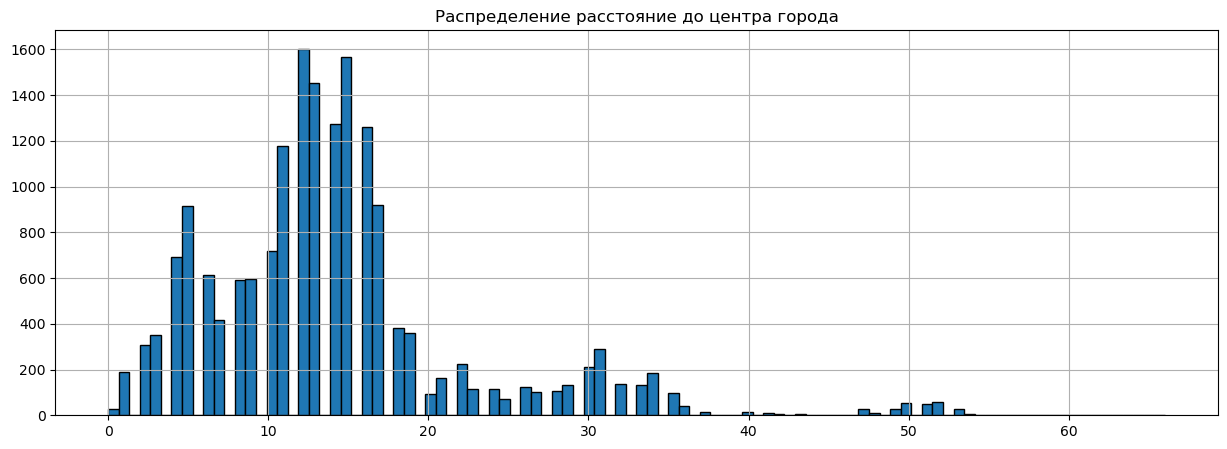

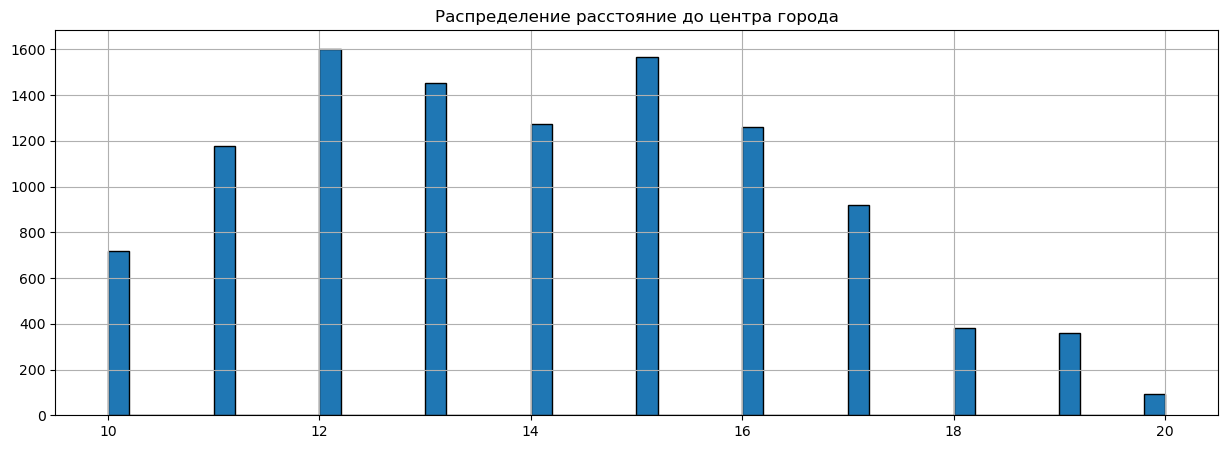

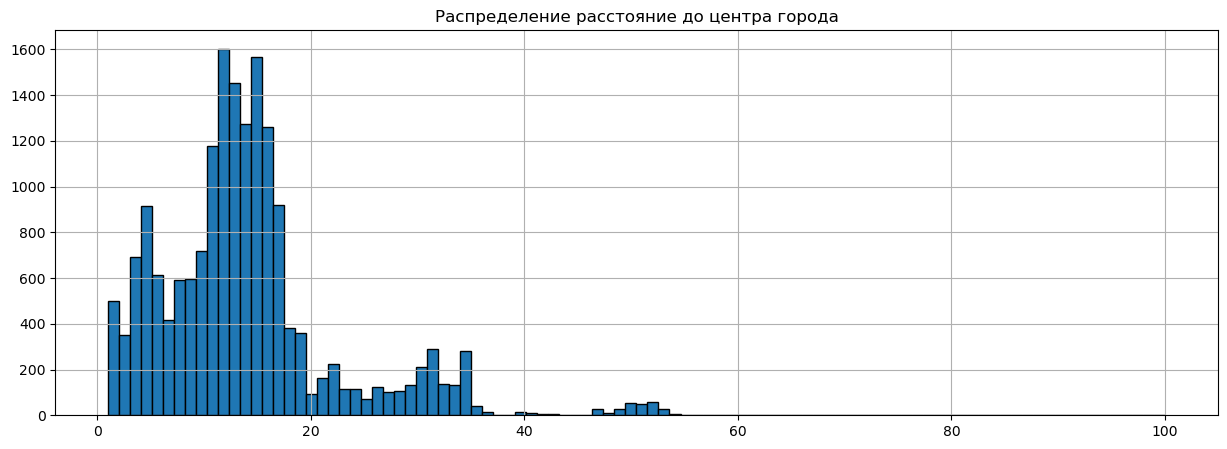

In [142]:
# гистограмма по всем объектам
df.hist('km_from_center', bins=100, ec='black', figsize=(15, 5))
plt.title('Распределение расстояние до центра города')
plt.show()
# гистограмма по средним 
df.hist('km_from_center', bins=50, ec='black', figsize=(15, 5), range=(10, 20))
plt.title('Распределение расстояние до центра города')
plt.show()
# гистограмма по верхним 
df.hist('km_from_center', bins=96, ec='black', figsize=(15, 5), range=(1, 100))
plt.title('Распределение расстояние до центра города')
plt.show()

Диаграмма размаха расстояния до центра города


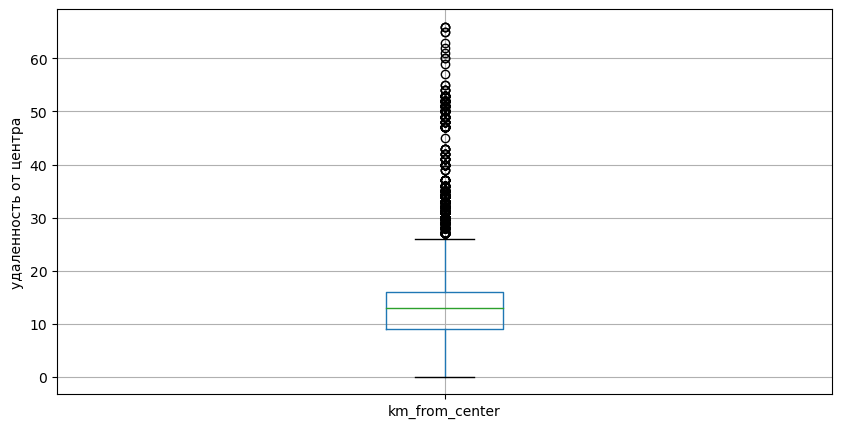

In [143]:
print('Диаграмма размаха расстояния до центра города')
df.boxplot(column=['km_from_center'], figsize=(10,5), grid=True)
plt.ylabel('удаленность от центра')
plt.show()

1. Выведем общие данные.
2. Построим гистограму и диаграмму размаха.
3. Минимальная удаленность от центра 0, максимальная 66 км. Больше всего квартир продается в 12 и 15 км от центра СПб, что логично т.к. это густо населенные спальные районы города, которые до сих пор активно застраиваются и развиваются. Меньше всего продается квартир за городом в 40 и более км от центра северной столицы, возможно за городом больше пользуется спросом другая недвижимость - частные дома и дачи.

**3.1.11. Расстояние до ближайшего аэропорта**

In [144]:
df['airports_nearest'] = (df['airports_nearest']/1000).round()
df['airports_nearest'].describe()

count   18064.00
mean       28.82
std        12.64
min         0.00
25%        19.00
50%        27.00
75%        37.00
max        85.00
Name: airports_nearest, dtype: float64

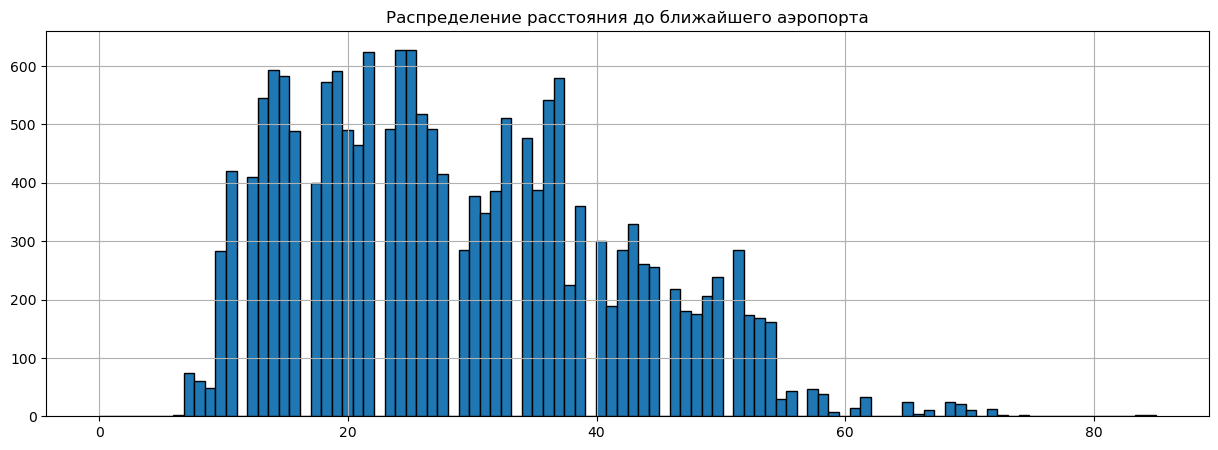

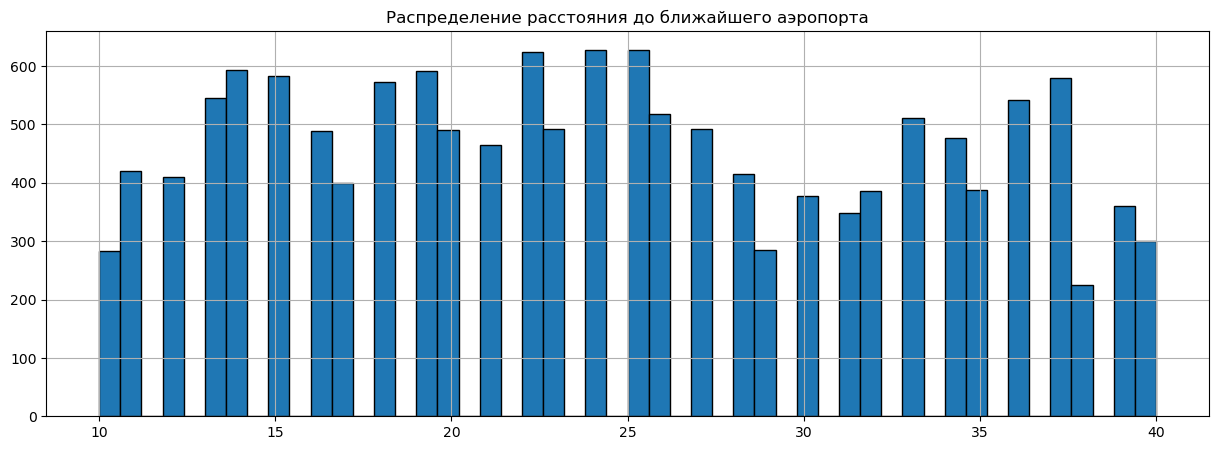

In [145]:
# гистограмма по всем объектам
df.hist('airports_nearest', bins=100, ec='black', figsize=(15, 5))
plt.title('Распределение расстояния до ближайшего аэропорта')
plt.show()
# гистограмма по средним 
df.hist('airports_nearest', bins=50, ec='black', figsize=(15, 5), range=(10, 40))
plt.title('Распределение расстояния до ближайшего аэропорта')
plt.show()

Диаграмма размаха расстояния до ближайшего аэропорта


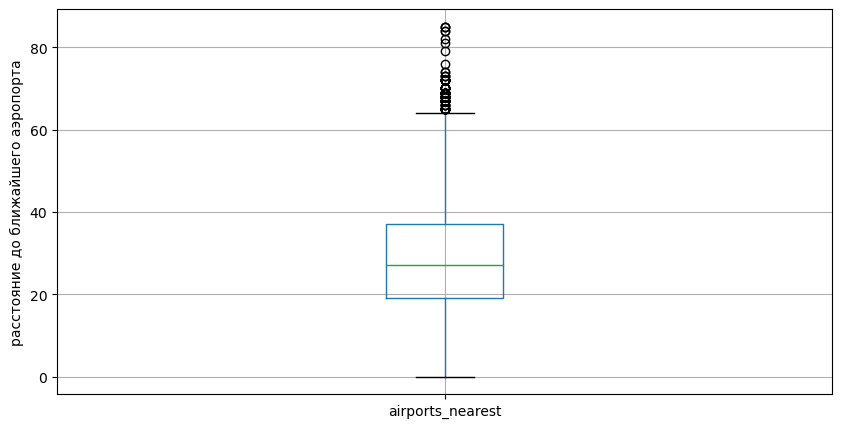

In [146]:
print('Диаграмма размаха расстояния до ближайшего аэропорта')
df.boxplot(column=['airports_nearest'], figsize=(10,5), grid=True)
plt.ylabel('расстояние до ближайшего аэропорта')
plt.show()

1. Переведем метры в километры. Выведем общие данные.
2. Построим гистограму и диаграмму размаха.
3. График подтверждает предыдущий вывод о том, что много квартир продается в спальных районах. Он наводит на мысль - наибольшая удаленность от аэропорта в 20-40 км говорит о том, что большая часть квартир в Спб распределена в северной части города, т.к. накладывается 2 фактора, удаленность от центра и удаленность от аэропорта.

**3.1.12. Расстояние до ближайшего парка**

In [147]:
df['parks_nearest'].describe()

count   8043.00
mean     490.76
std      342.18
min        1.00
25%      288.00
50%      455.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

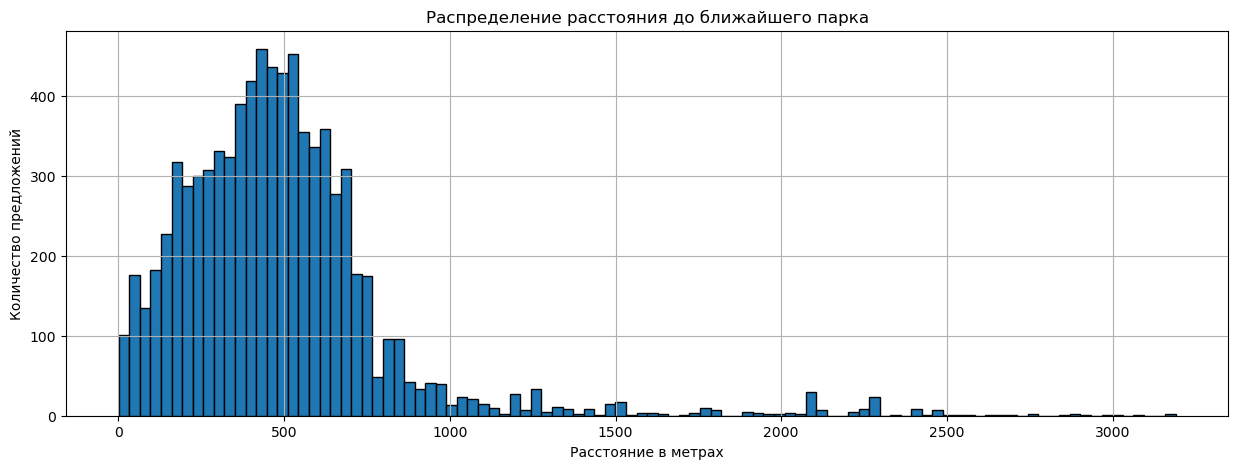

In [148]:
# гистограмма по всем объектам
df.hist('parks_nearest', bins=100, ec='black', figsize=(15, 5))
plt.title('Распределение расстояния до ближайшего парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество предложений')
plt.show()

Диаграмма размаха расстояния до ближайшего парка


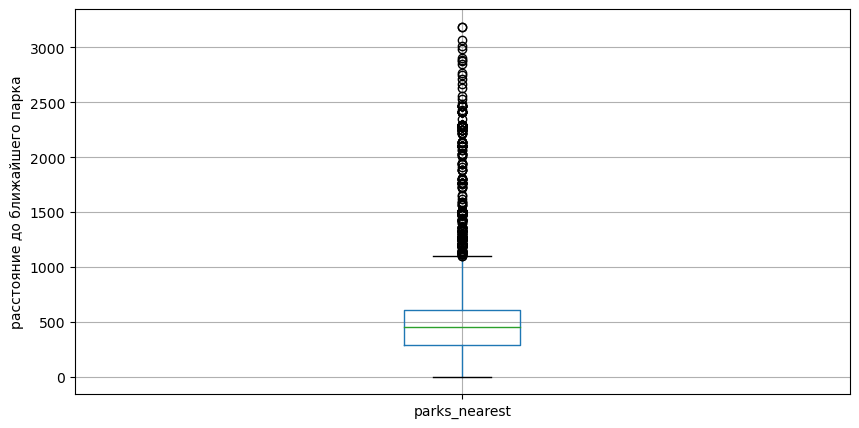

In [149]:
print('Диаграмма размаха расстояния до ближайшего парка')
df.boxplot(column=['parks_nearest'], figsize=(10,5), grid=True)
plt.ylabel('расстояние до ближайшего парка')
plt.show()

1. Выведем общие данные.
2. Построим гистограму и диаграмму размаха.
3. Среднее расстояние до ближайшего парка 490 метров, самое ближайшее - 1 метр, возможно у кого-то прямо за окном находится парк. Максимальное расстояние 3190 м, что так же не очень далеко т.к. 3 км среднестатистический человек проходит за 12-15 минут. Большая часть квартир продается в удаленности от парка в пределах 300-600 м.

**3.1.13. День и месяц публикации объявления**

In [150]:
df['week_day'].describe()

count   18088.00
mean        2.56
std         1.78
min         0.00
25%         1.00
50%         3.00
75%         4.00
max         6.00
Name: week_day, dtype: float64

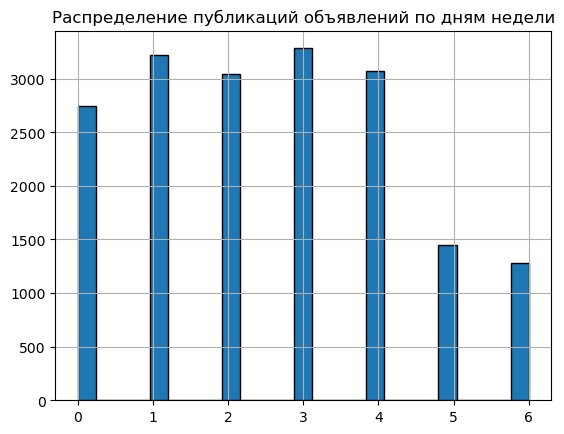

In [151]:
df.hist(column='week_day', bins=25, ec='black')
plt.title('Распределение публикаций объявлений по дням недели')
plt.show()

In [152]:
df['month'].describe()

count   18088.00
mean        6.41
std         3.47
min         1.00
25%         3.00
50%         6.00
75%        10.00
max        12.00
Name: month, dtype: float64

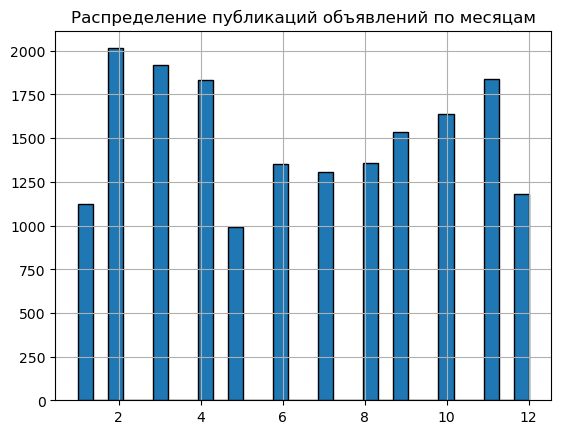

In [153]:
df.hist(column='month', bins=30, ec='black')
plt.title('Распределение публикаций объявлений по месяцам')
plt.show()

In [154]:
df['year'].describe()

count   18088.00
mean     2017.34
std         1.05
min      2014.00
25%      2017.00
50%      2017.00
75%      2018.00
max      2019.00
Name: year, dtype: float64

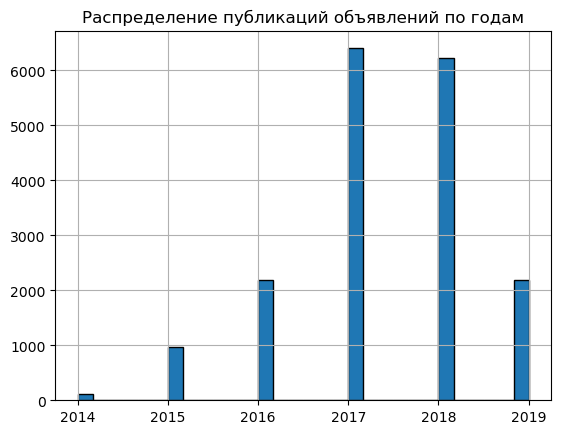

In [155]:
df.hist(column='year', bins=30, ec='black')
plt.title('Распределение публикаций объявлений по годам')
plt.show()

В 2017 и 2018 году было опубликовано больше всего объявлений о продаже квартир.

### 3.2. Посмотрим как быстро продавались квартиры.

In [156]:
df['days_exposition'].describe()

count   15786.00
mean      182.96
std       223.72
min         1.00
25%        43.00
50%        96.00
75%       233.00
max      1572.00
Name: days_exposition, dtype: float64

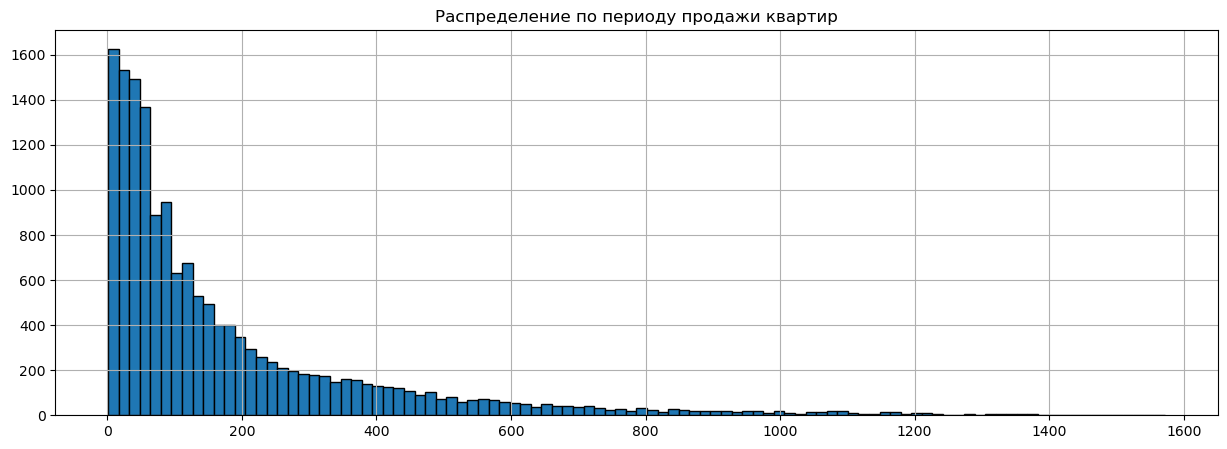

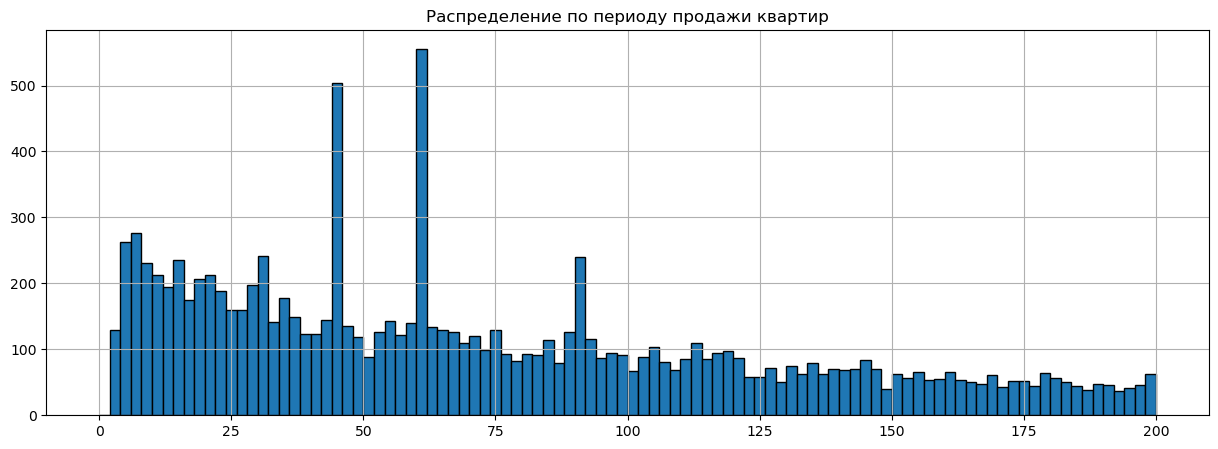

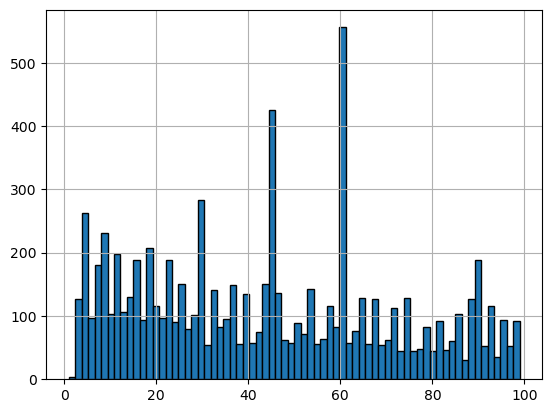

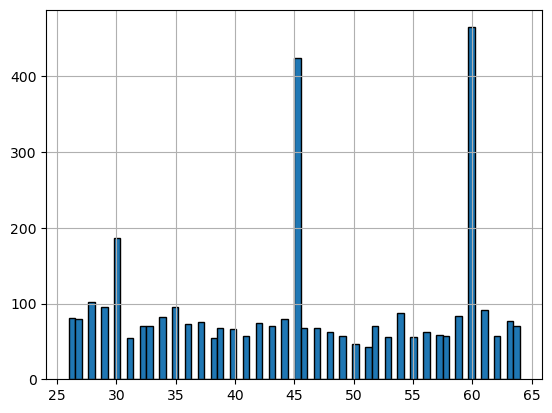

In [157]:
# гистограмма по всем объектам
df.hist('days_exposition', bins=100, ec='black', figsize=(15, 5))
plt.title('Распределение по периоду продажи квартир')
plt.show()
# гистограмма по верхним 
df.hist('days_exposition', bins=100, ec='black', figsize=(15, 5), range=(0, 200))
plt.title('Распределение по периоду продажи квартир')
plt.show()
#ограничим время размещения 100 днями и ещё раз построим гистограмму:
df.query('days_exposition<100')['days_exposition'].hist(bins=70, ec='black')
plt.show()

df.query('25<days_exposition<65')['days_exposition'].hist(bins=70, ec='black')
plt.show()

Диаграмма размаха по периоду продажи квартир


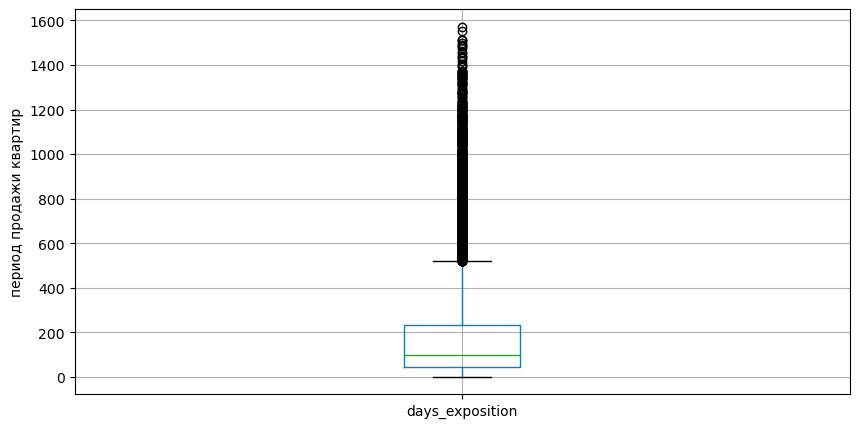

In [158]:
print('Диаграмма размаха по периоду продажи квартир')
df.boxplot(column=['days_exposition'], figsize=(10,5), grid=True)
plt.ylabel('период продажи квартир')
plt.show()

### 3.3. Посмотрим какие факторы больше всего влияют на стоимость объекта.

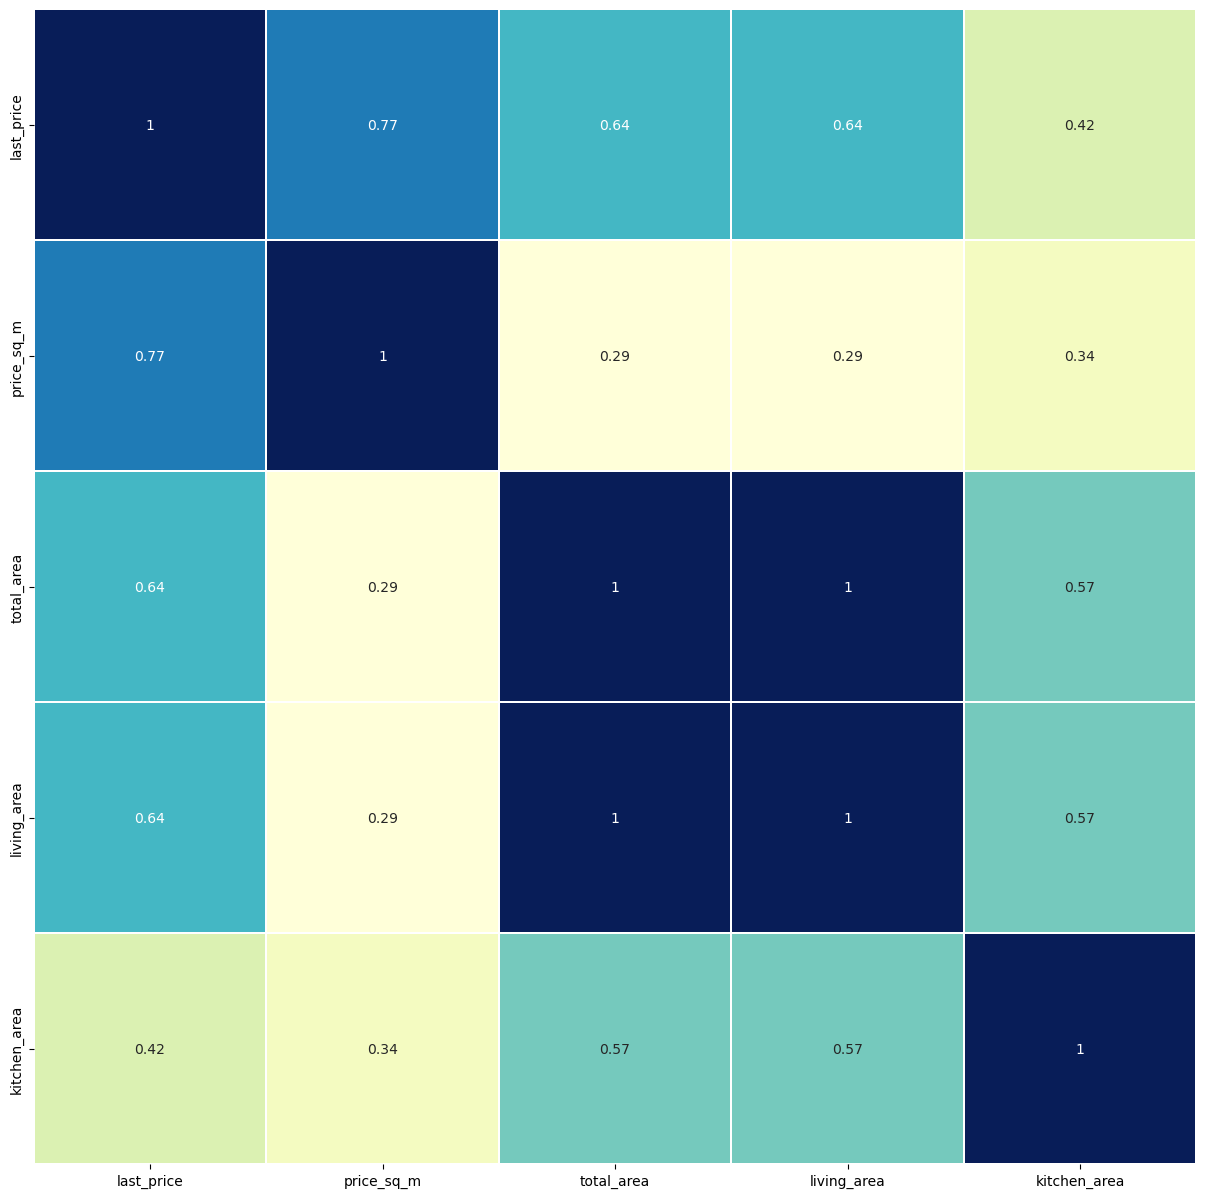

In [159]:
plt.figure(figsize=(15, 15))
sns.heatmap(df[['last_price', 'price_sq_m', 'total_area', 'living_area', 'kitchen_area']].corr(), annot=True, cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.show()

In [160]:
df[['last_price', 'price_sq_m', 'total_area', 'living_area', 'kitchen_area']].corr()

,last_price,price_sq_m,total_area,living_area,kitchen_area
last_price,1.00,0.77,0.64,0.64,0.42
price_sq_m,0.77,1.00,0.29,0.29,0.34
total_area,0.64,0.29,1.00,1.00,0.57
living_area,0.64,0.29,1.00,1.00,0.57
kitchen_area,0.42,0.34,0.57,0.57,1.00


In [161]:
 price_floor_type = (
    df.pivot_table(index='floor_type', values='price_sq_m', columns='rooms')
)
display(price_floor_type)

rooms,0,1,2,3,4,5,6,7,8,9,10,11,14,16,19
floor_type,,,,,,,,,,,,,,,
другой,122199.27,112745.75,111267.33,109686.80,121307.92,131159.47,138840.81,132221.67,181818.00,85666.50,71726.00,170015.00,92827.00,NaN,86091.00
первый,105662.57,102496.52,95023.32,92817.26,89450.88,99237.00,107113.00,135416.50,109858.67,172775.00,NaN,NaN,NaN,NaN,NaN
последний,121058.00,108804.19,105288.27,105979.58,120039.70,161114.94,162431.00,232772.71,244285.25,75999.50,111151.50,95264.00,NaN,105555.00,NaN


Cильнее всего цена на квартиру зависит:
- от цены за квадратный метр - **(0,77)**
- от общей площади квартиры - **(0.64)** (чем больше площадь, тем выше цена)
- от жилой площади - **(0.64)** (чем больше площадь, тем выше цена)
- от площади кухни - **(0.42)**
- от количества комнат - **(0.37)**  

Проверим взаимосвязь с другими параметрами.

In [164]:
df[['price_sq_m', 'last_price', 'balcony', 'ceiling_height', 'city_centers_nearest', 
         'is_apartment', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']].corr()

,price_sq_m,last_price,balcony,ceiling_height,city_centers_nearest,is_apartment,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
price_sq_m,1.00,0.77,0.02,0.32,-0.32,0.04,0.18,0.01,0.19,-0.10
last_price,0.77,1.00,0.00,0.33,-0.21,0.02,0.16,-0.02,0.16,-0.09
balcony,0.02,0.00,1.00,-0.09,0.07,0.03,-0.08,0.03,-0.04,0.02
ceiling_height,0.32,0.33,-0.09,1.00,-0.39,0.06,0.25,-0.05,0.23,-0.12
city_centers_nearest,-0.32,-0.21,0.07,-0.39,1.00,0.01,-0.16,-0.04,-0.08,0.03
is_apartment,0.04,0.02,0.03,0.06,0.01,1.00,0.02,-0.03,0.02,0.01
parks_around3000,0.18,0.16,-0.08,0.25,-0.16,0.02,1.00,-0.26,0.31,-0.17
parks_nearest,0.01,-0.02,0.03,-0.05,-0.04,-0.03,-0.26,1.00,0.08,0.00
ponds_around3000,0.19,0.16,-0.04,0.23,-0.08,0.02,0.31,0.08,1.00,-0.33
ponds_nearest,-0.10,-0.09,0.02,-0.12,0.03,0.01,-0.17,0.00,-0.33,1.00


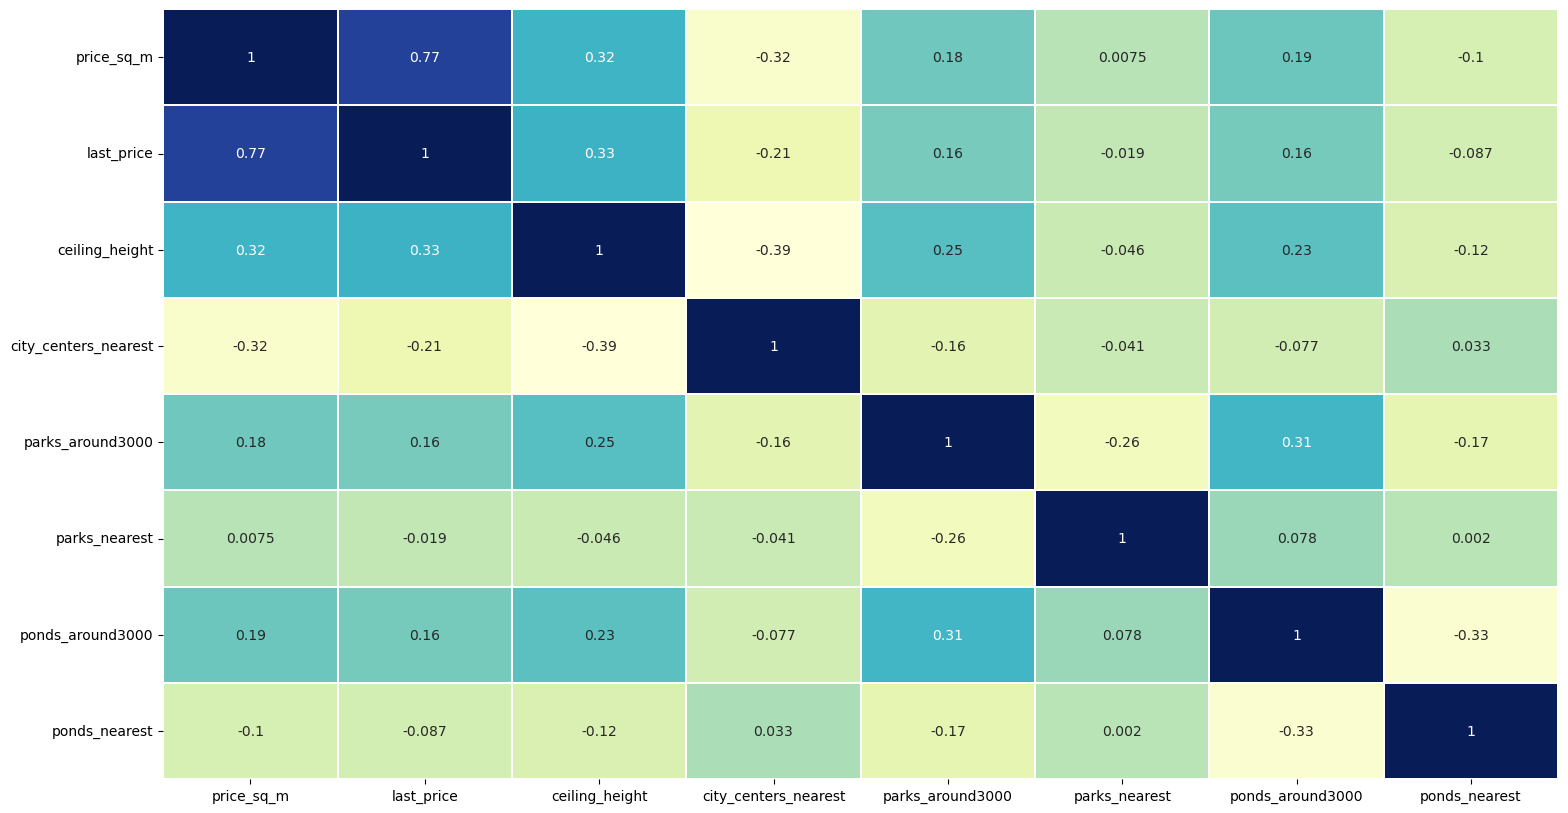

In [165]:
plt.figure(figsize=(18, 10))
sns.heatmap(df[['price_sq_m', 'last_price', 'ceiling_height', 'city_centers_nearest', 
         'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']].corr(), annot=True, cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.show()

In [168]:
def price_plot (df, column, name, ylims=None):
    df_sort = df.pivot_table(index= column, values='last_price', aggfunc='median')
    if ylims is None:
        plot = df_sort.sort_values(column).plot(y='last_price', kind='bar',figsize=(10,5), title = name)
    else:
        plot = df_sort.sort_values(column).plot(y='last_price', kind='bar',figsize=(10,5), title = name, ylim = ylims)
    return plot

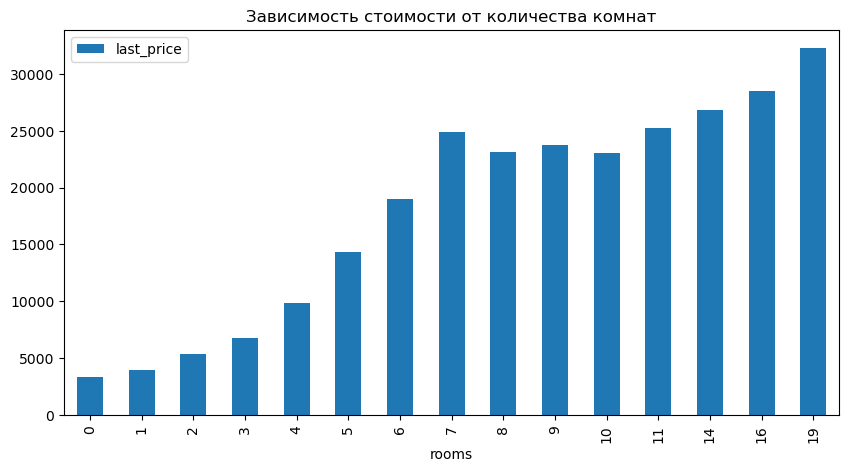

In [169]:
price_plot(df, 'rooms', 'Зависимость стоимости от количества комнат');

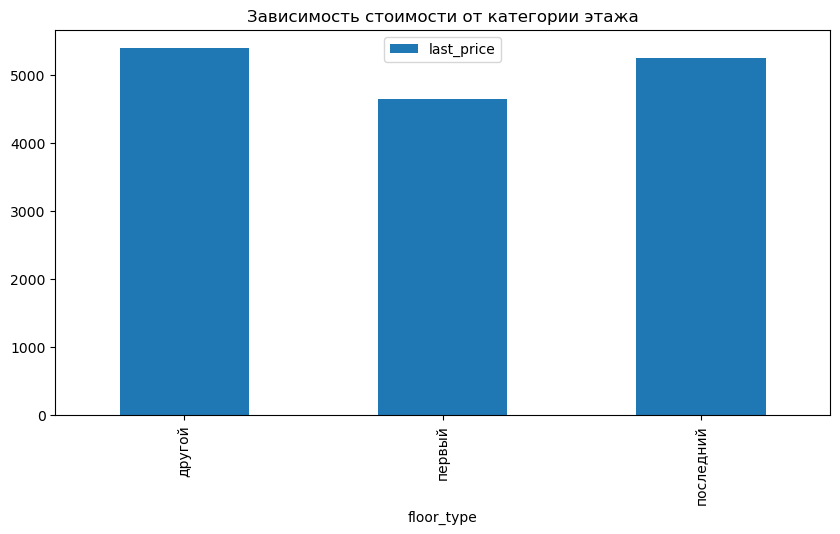

In [170]:
price_plot(df, 'floor_type', 'Зависимость стоимости от категории этажа');

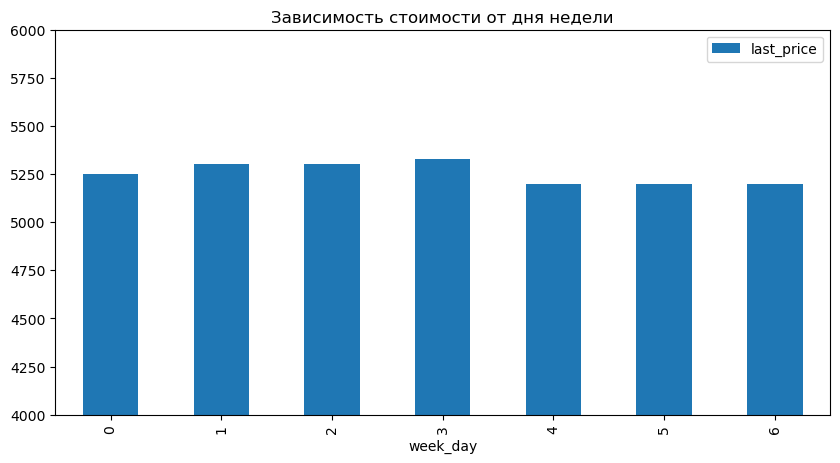

In [171]:
price_plot(df, 'week_day', 'Зависимость стоимости от дня недели', ylims=(4000, 6000));

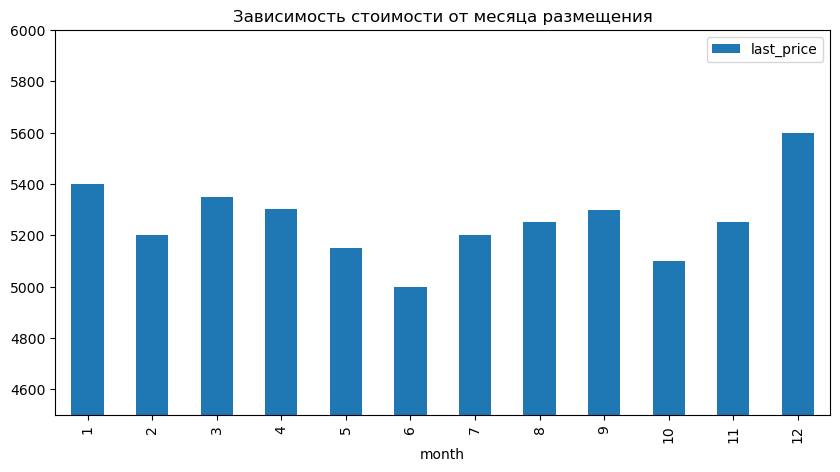

In [172]:
price_plot(df, 'month', 'Зависимость стоимости от месяца размещения', ylims=(4500, 6000));

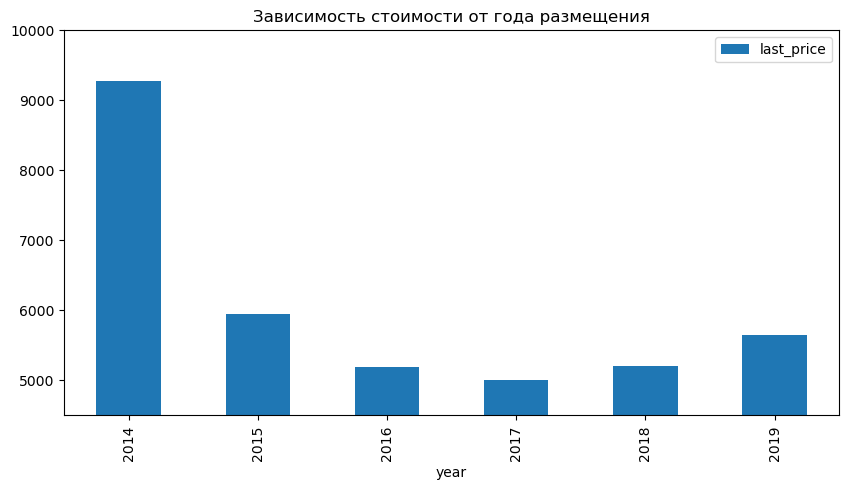

In [173]:
price_plot(df, 'year', 'Зависимость стоимости от года размещения', ylims=(4500, 10000));

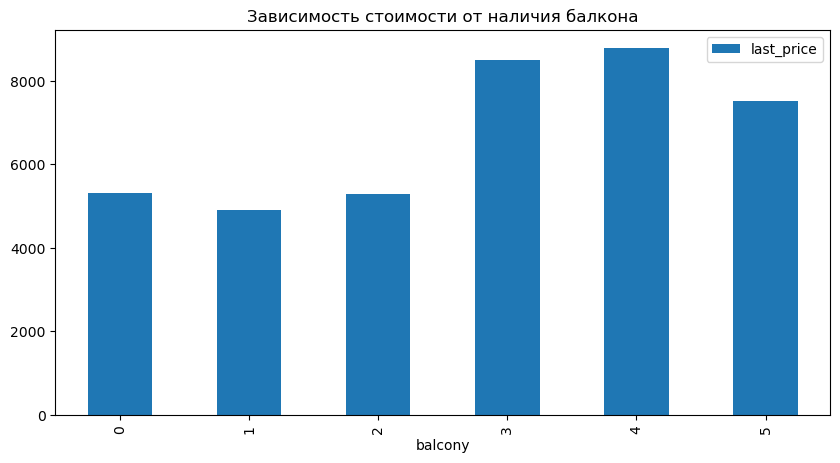

In [174]:
price_plot(df, 'balcony', 'Зависимость стоимости от наличия балкона');

### 3.4. 10 Населённых пунктов с наибольшим числом объявлений.

In [175]:
top_10 = (df
         .pivot_table(index='locality_name', 
                      aggfunc={'last_price':'count', 'price_sq_m':'mean'})
         .sort_values(by='last_price', ascending=False)
        ).head(10)
top_10

,last_price,price_sq_m
locality_name,,
Санкт-Петербург,15614,114526.17
Шушары,435,78451.46
Пушкин,367,103024.98
Колпино,337,75402.07
Парголово,327,90175.49
Петергоф,201,84757.10
Сестрорецк,183,101757.16
Красное Село,176,72008.96
Ломоносов,132,72609.39


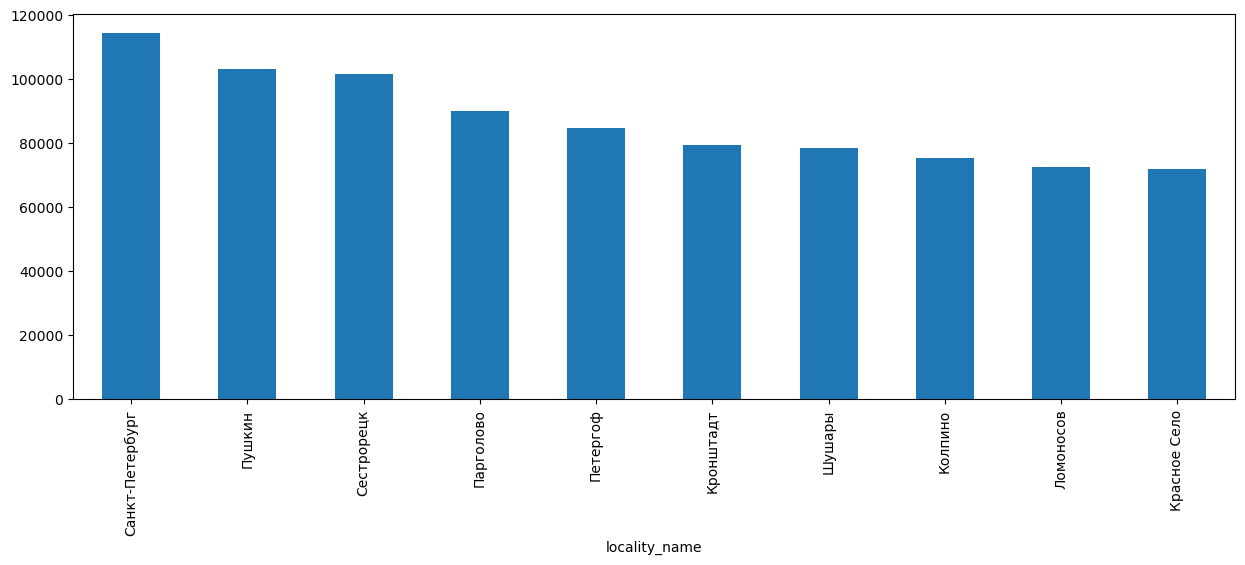

In [176]:
(
    top_10
    .sort_values(by='price_sq_m', ascending=False)['price_sq_m']
    .plot(figsize=(15,5), kind='bar')
);

### 3.5. Как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге.

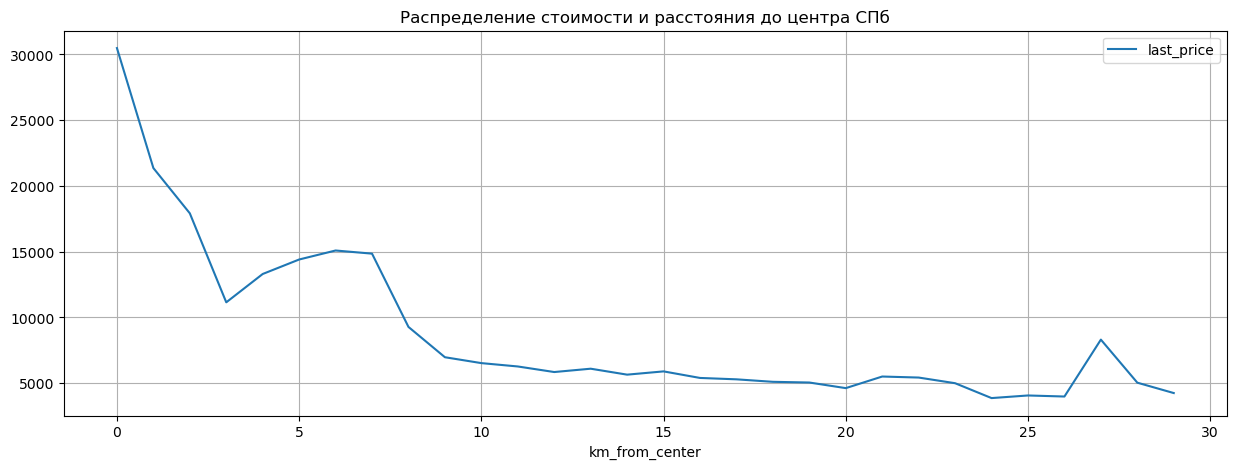

In [177]:
(
    df[df['locality_name']=='Санкт-Петербург']
    .pivot_table(index='km_from_center', values='last_price', aggfunc='mean')
    .plot(figsize=(15,5), grid=True)
)
plt.title('Распределение стоимости и расстояния до центра СПб')
plt.show()

,price_sq_m
km_from_center,
0.00,242998.62
1.00,175912.32
2.00,157916.26
3.00,121143.70
4.00,133078.80
5.00,140068.31
6.00,150026.22
7.00,156538.77


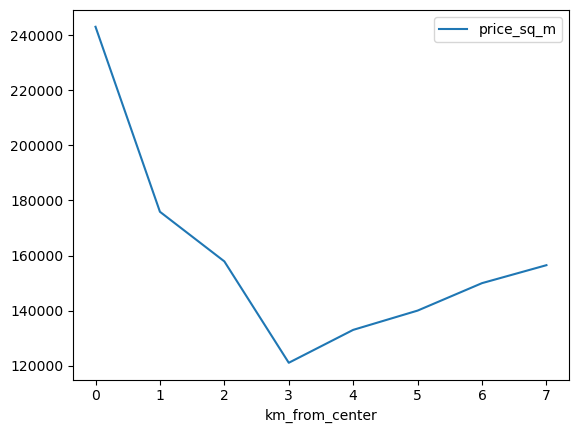

In [178]:
centr_pivot_km = df.query('locality_name == "Санкт-Петербург" and km_from_center < 8').pivot_table(index = 'km_from_center', values = 'price_sq_m', aggfunc = 'mean')
centr_pivot_km.plot()
centr_pivot_km

1. Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и построим график изменения стоимости в зависимости от удаленности от центра СПб. 
Сильное понижение цены происходит примерно на 7 км, поэтому выберем этот диапазон, чтобы посмотреть подробнее на изменение цен.

2. Выведем среднюю цену для каждого километра. Построим график, который покажет как цена зависит от удалённости от центра. 
График сильно меняется на 3 км, скорее всего там заканчивается граница СПб. Заметна сильная зависимость стоимости объекта от удаленности от центра СПб. Это определенно один из ключевых факторов, влияющих на стоимость недвижимости в Санкт-Петербурге.

## Шаг 4. Общий вывод. <a class="anchor" id="four"></a>

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18088 entries, 0 to 23696
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 18088 non-null  int64         
 1   total_images          18088 non-null  int64         
 2   last_price            18088 non-null  float64       
 3   total_area            18088 non-null  float64       
 4   first_day_exposition  18088 non-null  datetime64[ns]
 5   rooms                 18088 non-null  int64         
 6   ceiling_height        18088 non-null  float64       
 7   floors_total          18088 non-null  int64         
 8   living_area           18088 non-null  float64       
 9   floor                 18088 non-null  int64         
 10  is_apartment          18088 non-null  bool          
 11  studio                18088 non-null  bool          
 12  open_plan             18088 non-null  bool          
 13  kitchen_area         

  В этом проекте мы проанализировали данные, собранные за несколько лет с сервиса Яндекс.Недвижимость. 

**I.**  Изначально входные данные были очень сырыми и недоработанными, у нас было 23699 строк и 22 столбца, с различными типами данных, большим количеством пропусков (14 столбцов) и аномалий. По окончании исследования в нашем наборе стало 18088 строк и 29 столбцов. 
  К сожалению все пропуски восполнить не удалось т.к. заполняя их средним или медианным значением, мы могли бы сильно исказить результаты исследования, чего не следовало бы делать.
  Есть несколько предположений относительно природы возникновения пропусков и аномалий в данных:
1. Пользователи не заполняют все предложенные параметры при публикации объявлений.
2. Пользователи некорректно указывают данные об объектах, допуская опечатки.
3. Было объединение нескольких наборов данных с несовпадающими значениями переменных из-за чего данные оказались потеряны.
4. При сборе информации был допущен пропуск, тех. ошибка системы или человеческий фактор.
5. Форма данных изменилась со временем и появились дополнительные строки или столбцы, которые ранее не фиксировались.
6. Какие-то характерные признаки просто не существуют для выставляемого на продажу объекта.

**II.**  В процессе предобработки данных была проделана следующая работа:
- восполнены пропущенные значения по *высоте потолков* с помощью усредненных значений по категориям районов СПб;
- *этажность* МКД заполнили смежными данными с "коэффициентом", на такой шаг решили пойти т.к. было мало пропусков;
- пропуски в *жилой площади* заполнили на основе среднего коэффициента отношения жилой площади к количеству комнат, убрали одно аномальное значение. Оставшиеся пропуски заполнили при помощи функции с данными метражных нормативов;
- заполнили пропуски *площади кухни* средним значением;
- основываясь на предположении, что *отсутствие балконных блоков*, лоджий компенсируется с помощью современных решений — панорамным остеклением, наличием в квартире гардеробныхпомещений, кладовых, которые могут также размещаться в цокольном этаже дома или подземномпаркинге заменили пропуски на 0;
- пропуски в данных по *наличию парков и водоёмов вблизи 3 км* заменили на 0 т.к. скорее всего их просто нет возле объектов;
- на основе некоторых географических данных, удалось заполнить часть пропусков в столбце *населенных пунктов*;
- данные о принадлежности объекта к *апартаментам* заполнили отрицательным значением т.к. эти пропуски вероятнее всего говорят нам о том, что объект не является апартаментами.
- была произведена *замена типа данных* по 6 столбцам, чтобы была возможность манипулировать этими значениями;
- преобразовали регистр в названии столбца *'cityCenters_nearest'*;
- проработаны неявные дубликаты в *наименованиях населенных пунктов*,было принято решение оставить лишь главное наименование без указания типа населенного пункта - город, село, поселок и т.д. Решение было принято по причине ограниченного региона СПб и ЛО, маловероятно спутать населенные пункты в рамках одного региона. Произвели замену ё на е.
- Добавили несколько столбцов для более удобного взаимодействия с набором данных при исследовании (*цена м2, разбили дату на денб/месяц/год, провели категоризацию этажности МКД, расстояние до центра перевели в км.*)

**III.**  В ходе изучения некоторых параметров из нашей выборки, мы заметили некоторые особенности:

- *общая площадь* квартир колеблется от 12 до 900 м2. Это говорит о различных типах квартир - от комнат-квартир в общежитии до коммерческой или элитной. Полагаю, что такой разброс по квартирам свойственен лишь двум регионам - Москве и Санкт-Петербургу. Среднее значение метража в пределах 60 м2.;
- *жилая площадь* после небольшой корректировки зафиксировалась в диапазоне от 8 до 887 м2. Среднее значение стало 47 м2;
- *площадь кухни* также после корректировки выбросов приобрела диапазон от 5 до 77 м2. Среднее значение после корректировки практически не изменилось и было равно 10;
- в столбце со *стоимостью объектов* был выброс в 12190 тыс., что говорит скорее об ошибке при вводе данных самим пользователем сервиса. Средняя стоимость квартир - 6.5 млн. Выше 100 млн встречаются единичные объекты с большой площадью. После корректировки данных минимальное значение стало 430000, что тоже мало, но возможно, если речь идет про какой-то максимально удаленный объект на краю ЛО. Дополнительно скорректировали отображение стоимости отбросив три 0;
- большинство объектов на рынке до 5 *комнат*, менее 1% - 6 комнат. Больше всего на продажу выставлялись однушки, двушки и трешки;
- Разброс *высоты потолков* изначально был от 1 до 100 м, ошибки могли возникнуть из-за некорректного указания данных пользователем. После корректировки выбросов, диапазон высоты сузился с 2.30 до 8.30 м, что уже ближе к реальности;
- больше на продаже представлены квартиры с 1 по 5 *этажи*, что можно объяснить старым малоэтажным жилым фондом;
- 76% квартир выставленных на продажу располагаются не на первых и последних этажах, квартиры на последних этажах в цене выше чем на первых, однако ситуация меняется,когда в квартире 6-9 комнат, возможно на такие квартиры есть спрос с коммерческим подтекстом (под отели, перевод в коммерческую недвижимость);
- больше всего квартир продается на 5 и 9 *этажах*, однако нельзя опираться на эти данные т.к. не достаточно смежных данных, которые могли бы прояснить ситуацию (год постройки, точный адрес);
- больше всего квартир продается в 12 и 15 км *от центра СПб*, что логично т.к. это густо населенные спальные районы города, которые активно застраиваются и развиваются. Меньше всего продается квартир за городом в 40 и более км от центра северной столицы, скорее всего на этих территориях люди отдают предпочтение частным домам и дачам;
- большая часть продаваемых квартир в СПб распределена в северной части города, т.к. накладывается 2 фактора,удаленность от центра и удаленность от *аэропорта*;  
- большая часть квартир продается в *удаленности от парка* в пределах 300-600 м.;  
- со вторника по четверг пользователи размещают на продажу квартиры немногим дороже, чем в другие дни недели, в четверг значение по стоимости незначительно превышает значения вторника и среды. В конце недели с пт по вс наблюдается одинаковая пониженная стоимость квартир;
-  в январе-декабре стоимость на недвижимость значительно повышается. Так уж исторически сложилось, что декабрь на рынке недвижимости известен большим покупательским спросом и впечатляющими предложениями. В январе спрос на рынке недвижимости традиционно падает: кто-то улетает на отдых, кто-то уже потратил значительную часть бюджета на подарки, а кто-то ждет окончания банковских каникул и одобрения заявки на ипотечный кредит, поэтому январь немного напоминает торговый центр после распродажи — ассортимент уже не так широк. Выражен сильный спад цены в летний период, когда мнoгиe пoкyпaтeли нaxoдятcя в oтпycкax, особенно это заметно в июне;
-  в течении 2014 года произошел ряд событий, который привёл к тому что размер ключевой ставки ЦБ РФ был поднят с 5,5% до 17% в декабре 2014, что привело, в том числе, к повышению ставок по ипотеке и кризису в 2015 году, соответственно спрос на недвижимость и, как следствие, стоимость недвижимости резко снизилась. Снижение стоимости продолжалось до 2017 года, с 2018 наметился рост, который продолжался до 2019 года;

**IV.**  Минимальное время размещения объявления на сервисе составляет 1 день, максимальное - 1572 дня. Обнаруженные выбросы в 30 и 60 дней могут быть связаны с автопродлением платного объявления. Есть странное повышение активности на 45 день публикации, этот момент необходимо уточнить у сотрудника предоставившего данные т.к. природу такого выброса осталась непонятна. 

**V.**  Анализ расчета рыночной цены жилья Санкт-Петербурга и Ленобласти помог оценить взаимосвязь и влияние на цену количественных и качественных показателей. В соответствии с коэффициентом корреляции Пирсона, сильнее всего на ценовую политику влияют:
- установленная цена за м2 (0,77)
- общая площадь квартиры м2 (0.64)
- жилая площадь м2 (0.64)
- площадь кухни м2 (0.42)
- количество комнат (0.37)

  Такие показатели были вполне ожидаемы т.к. данные критерии являются существенными, влияющими на рыночную стоимость квартиры. Также на стоимость квартиры значительно влияют временные показатели, ей присуща некая сезонность и конечно она сильно зависит от политической и экономической ситуации в стране, что мы наглядно смогли рассмотреть на графике с годовыми показателями с 2014 по 2019 года.

По второстепенным факторам можно отследить очень слабую взаимосвязь между:
- ценой и высотой потолков (0.33)
- присутствием парков и водоемов вблизи объекта (0.16)

  Также наблюдается логичная отрицательная корреляция по расстоянию от центра -
(-0.21), которая говорит нам о том, что чем дальше от центра располагается квартира, тем ниже становится её цена.

**VI.**  В разрезе 10 населенных пунктов с наибольшим количеством выставленных объектов на продажу, самым дорогим является Санкт-Петербург (114526 ₽ за м2), за ним идёт Пушкин (103024 ₽ за м2), а на 3м месте идет Сестрорецк (101757 ₽ за м2).
В разрезе 10 населенных пунктов с наибольшим количеством выставленных объектов на продажу, самыми бюджетными оказались Красное Село (72008 ₽ за м2), Ломоносов (72609 ₽ за м2) и Колпино (75402 ₽ за м2).

На эти выводы влияет множество доп. факторов, такие как транспортная инфраструктура, экологичность района, удаленность от "цивилизации", историко-архитектурная ценность.

В целом можно сделать вывод о том, что стоимость квартиры, указанная в объявлении о ее продаже, зачастую не имеет ничего общего с фактической стоимостью недвижимости. Чаще всего она показывает ожидания агента или самого собственника, выставившего недвижимость на продажу, о ее стоимости в рамках доступной ему информации, зависящей от объективных характеристик квартиры, субъективного восприятия рынка недвижимости, понимания сложившейся экономической ситуации в стране и некоторых персональных предпочтений и причин, по которым квартира была выставлена на продажу.
  Кто-то захочет до последнего торговаться при заключении сделки за каждый шкаф, которой останется новым хозяевам, другие продают квартиры в новостройках из коммерческих соображений, а кому-то нужно побыстрее получить деньги/расстатьcя с жилплощадью и переехать в другой город  - все это непосредственно влияет на цену в объявлении. Также неизвестно насколько объективна цена в объявлении для случаев, когда продажей занимается риелторское агентство.

В обязательные ключевые параметры жилья при расчете рыночной стоимости предполагаю включить:
- местоположение объекта
- цену за м2
- площадь (общую, жилую, кухни)
- количество комнат
- высоту потолков

Из второстепенных пока можно существенно выделить лишь наличие парков и водоемов по близости, т.е. инфраструктуры.